In [ ]:
from google.colab import files
files.upload()

In [8]:
!unzip multipleChoiceResponses.csv.zip
!unzip freeformResponses.csv.zip

Archive:  multipleChoiceResponses.csv.zip
  inflating: multipleChoiceResponses.csv  
Archive:  freeformResponses.csv.zip
  inflating: freeformResponses.csv   


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import base64
import io
import codecs
from IPython.display import HTML
from matplotlib_venn import venn2
from subprocess import check_output

In [14]:
response=pd.read_csv('./multipleChoiceResponses.csv',encoding='ISO-8859-1')

In [15]:
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

In [16]:
print('The total number of respondents:',response.shape[0])
print('Total number of Countries with respondents:',response['Country'].nunique())
print('Country with highest respondents:',response['Country'].value_counts().index[0],'with',response['Country'].value_counts().values[0],'respondents')
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


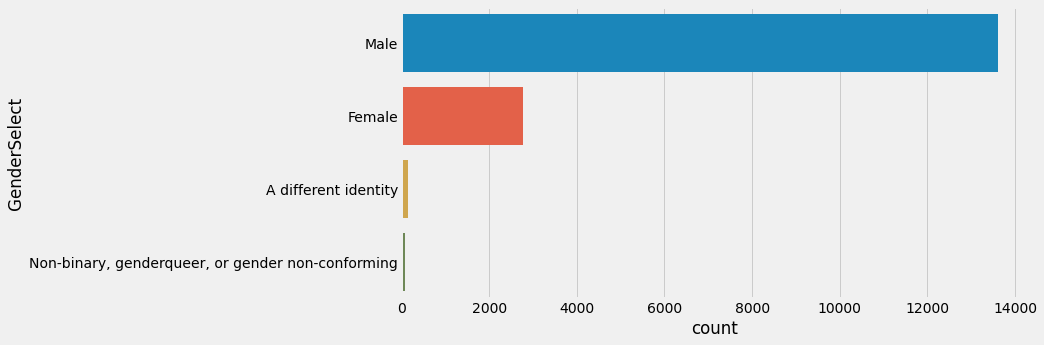

In [18]:
plt.subplots(figsize=(10,5))
sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
plt.show()

In [25]:
!pip install squarify
import squarify

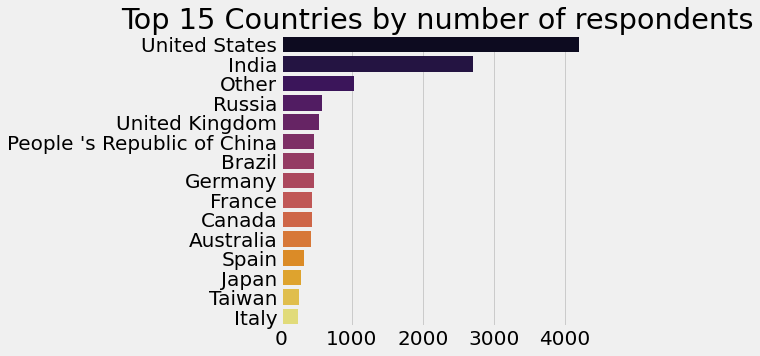

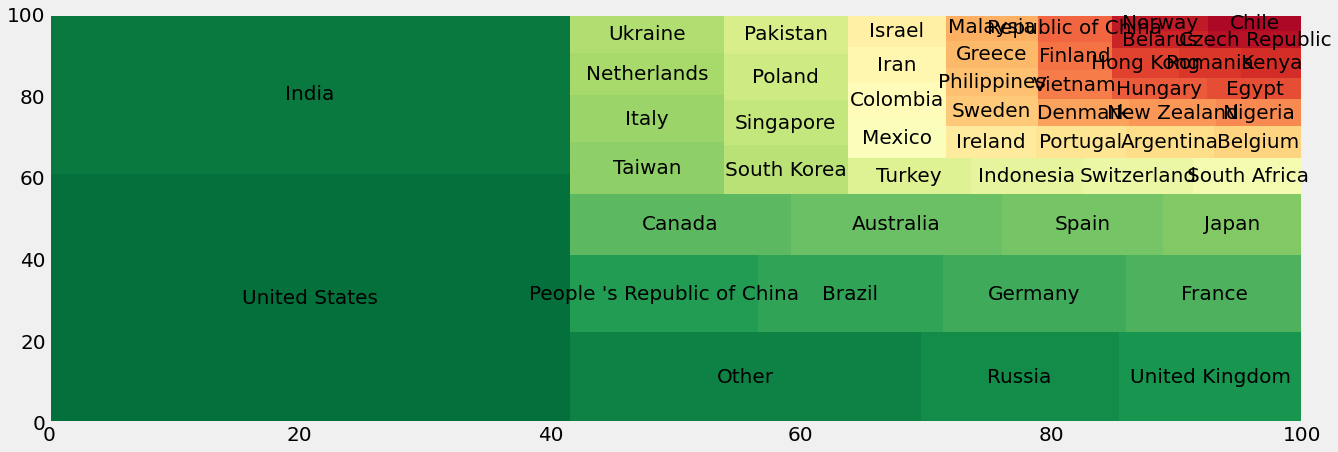

In [27]:
resp_coun=response['Country'].value_counts()[:15].to_frame()
sns.barplot(resp_coun['Country'],resp_coun.index,palette='inferno') # bar plot
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

tree=response['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values,label=tree.index,color=sns.color_palette('RdYlGn_r',52)) # squarify plot
plt.rcParams.update({'font.size':20})
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()

In [29]:
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')

rates=pd.read_csv('./conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

salary=response[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']

print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


In [45]:
salary

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.000
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.800
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.400
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.900
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.400
...,...,...,...,...,...,...,...,...
4362,50000,USD,Male,Other,DBA/Database Engineer,USD,1.000000,50000.000
4363,84000,EUR,Male,Germany,Software Developer/Software Engineer,EUR,1.195826,100449.384
4364,200000,USD,Male,United States,Data Scientist,USD,1.000000,200000.000
4365,75000,EUR,Male,Norway,Data Analyst,EUR,1.195826,89686.950


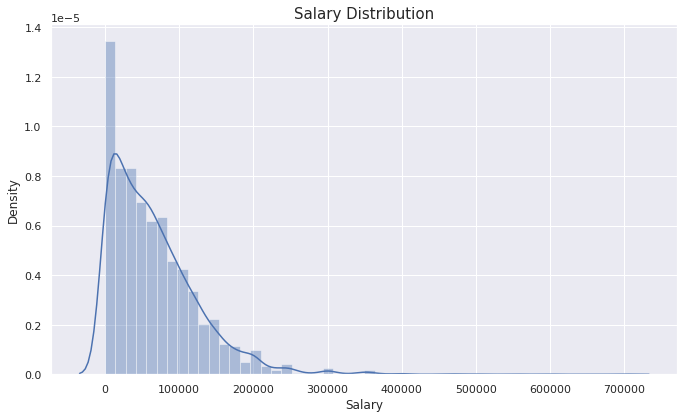

In [41]:
plt.subplots(figsize=(10,6))
salary=salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])
sns.set_theme(font_scale=1)
plt.title('Salary Distribution',size=15)
plt.show()

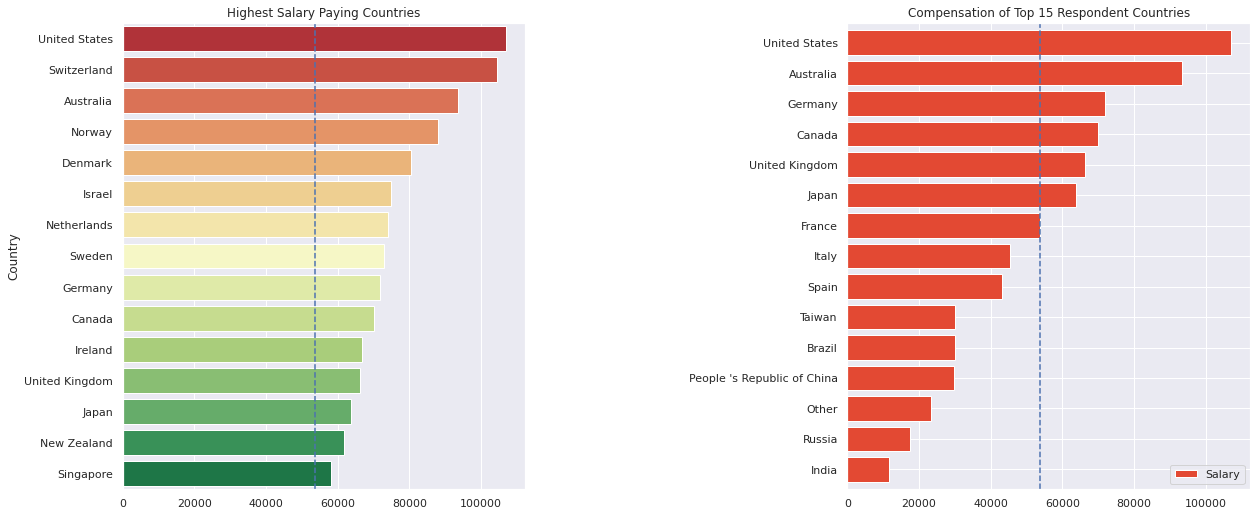

In [42]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sal_coun=salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('Salary',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
ax[0].axvline(salary['Salary'].median(),linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')

max_coun=salary.groupby('Country')['Salary'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='Salary',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(),linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

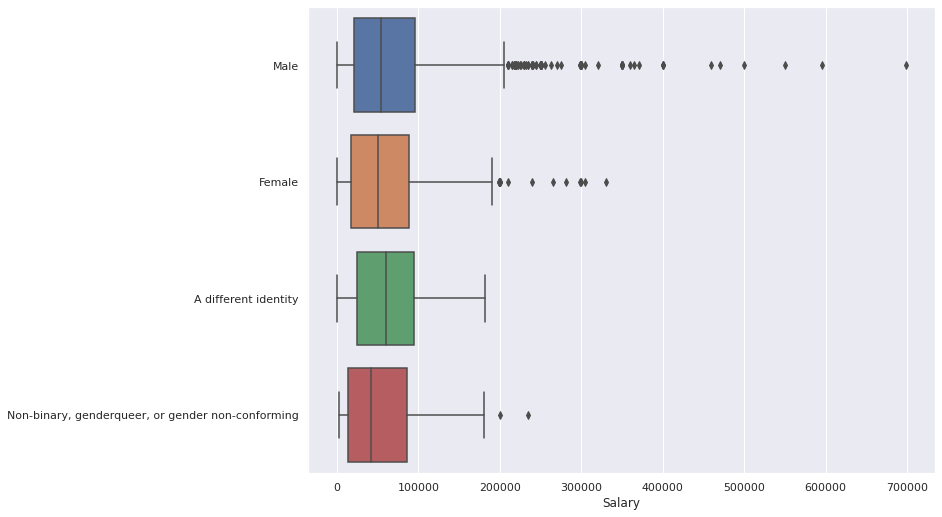

In [44]:
plt.subplots(figsize=(10,8))
sns.boxplot(y='GenderSelect',x='Salary',data=salary)
plt.ylabel('')
plt.show()

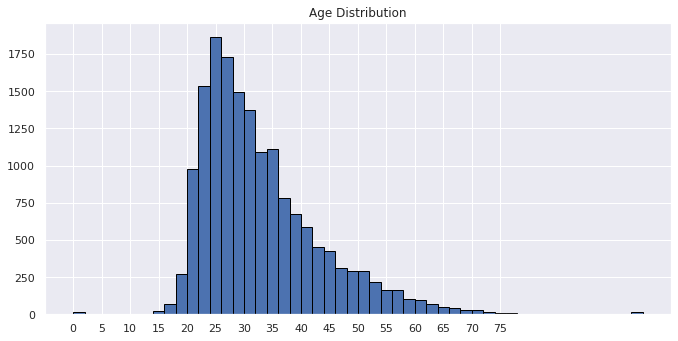

In [46]:
plt.subplots(figsize=(10, 5))
response['Age'].hist(bins=50,edgecolor='black')
plt.xticks(list(range(0,80,5)))
plt.title('Age Distribution')
plt.show() 


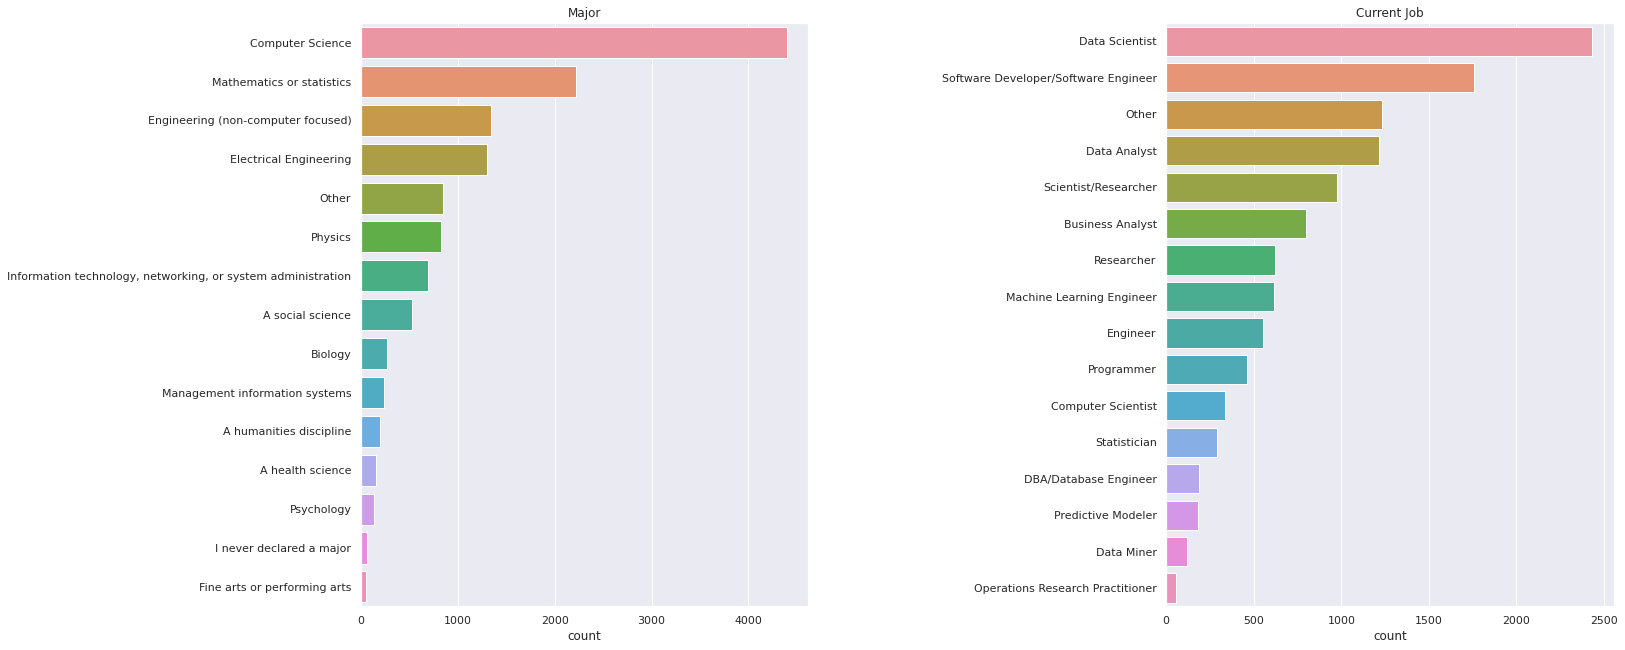

In [48]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(y=response['MajorSelect'],ax=ax[0],order=response['MajorSelect'].value_counts().index)
ax[0].set_title('Major')
ax[0].set_ylabel('')
sns.countplot(y=response['CurrentJobTitleSelect'],ax=ax[1],order=response['CurrentJobTitleSelect'].value_counts().index)
ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

Later on we will check are these respondents real data-scientists or self proclaimed data-scientists.

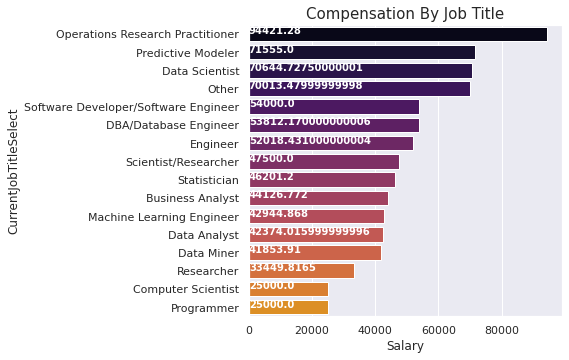

In [49]:
sal_job=salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary',ascending=False)
ax=sns.barplot(sal_job.Salary,sal_job.index,palette=sns.color_palette('inferno',20))
plt.title('Compensation By Job Title',size=15)
for i, v in enumerate(sal_job.Salary): 
    ax.text(.5, i, v,fontsize=10,color='white',weight='bold')
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

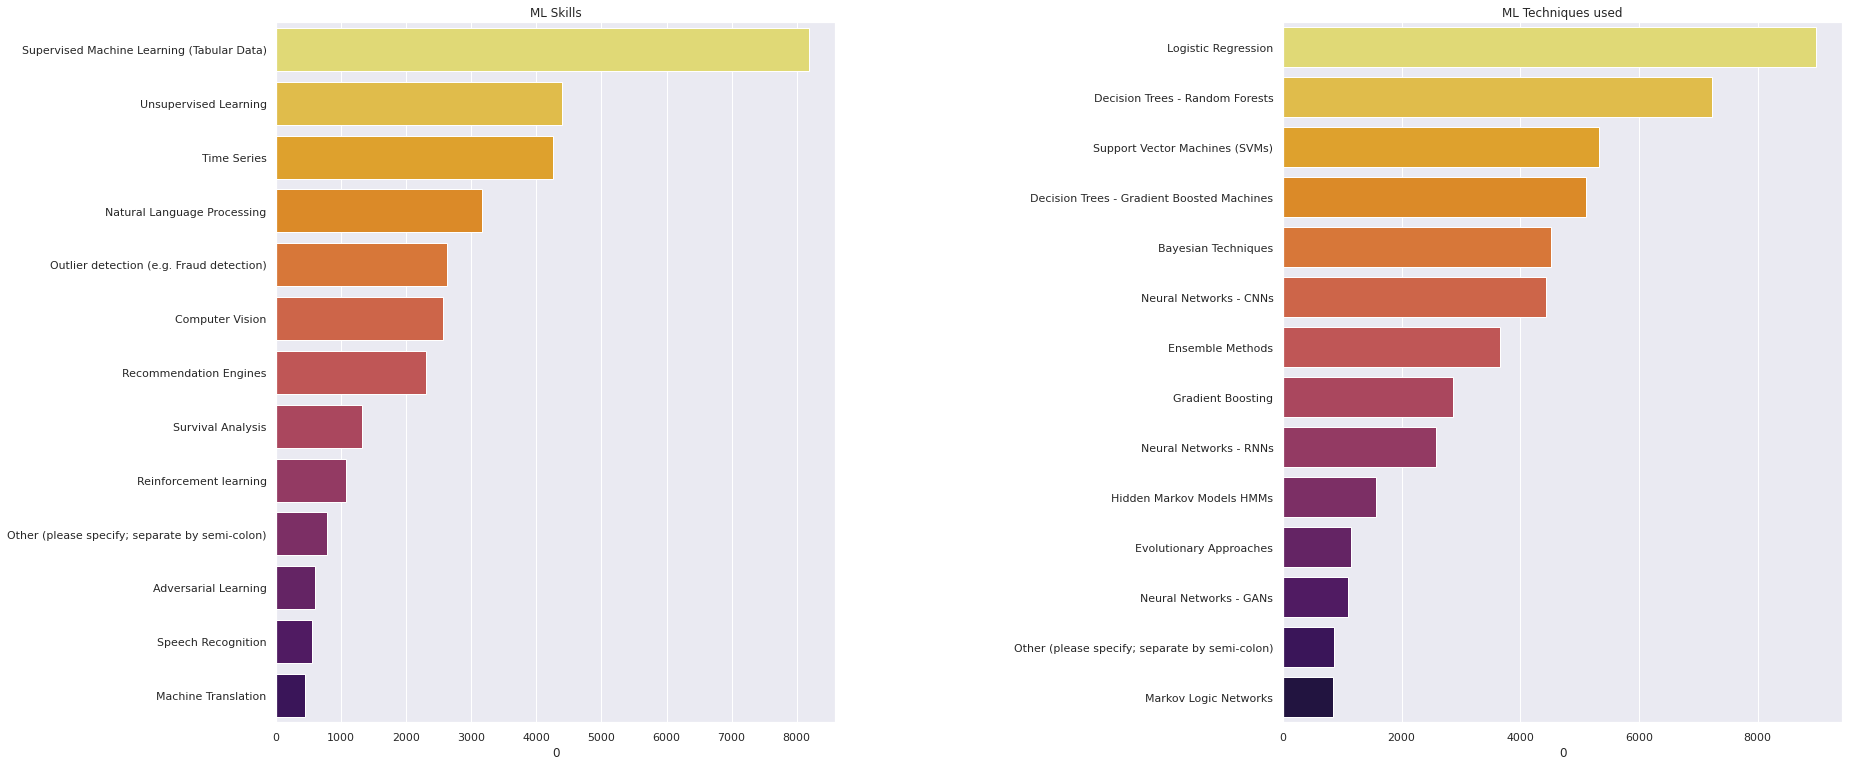

In [50]:
f,ax=plt.subplots(1,2,figsize=(25,12))
skills=response['MLSkillsSelect'].str.split(',')
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)
plt1=pd.Series(skills_set).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[0],palette=sns.color_palette('inferno_r',15))
ax[0].set_title('ML Skills')
tech=response['MLTechniquesSelect'].str.split(',')
techniques=[]
for i in tech.dropna():
    techniques.extend(i)
plt1=pd.Series(techniques).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('inferno_r',15))
ax[1].set_title('ML Techniques used')
plt.subplots_adjust(wspace=0.8)
plt.show()

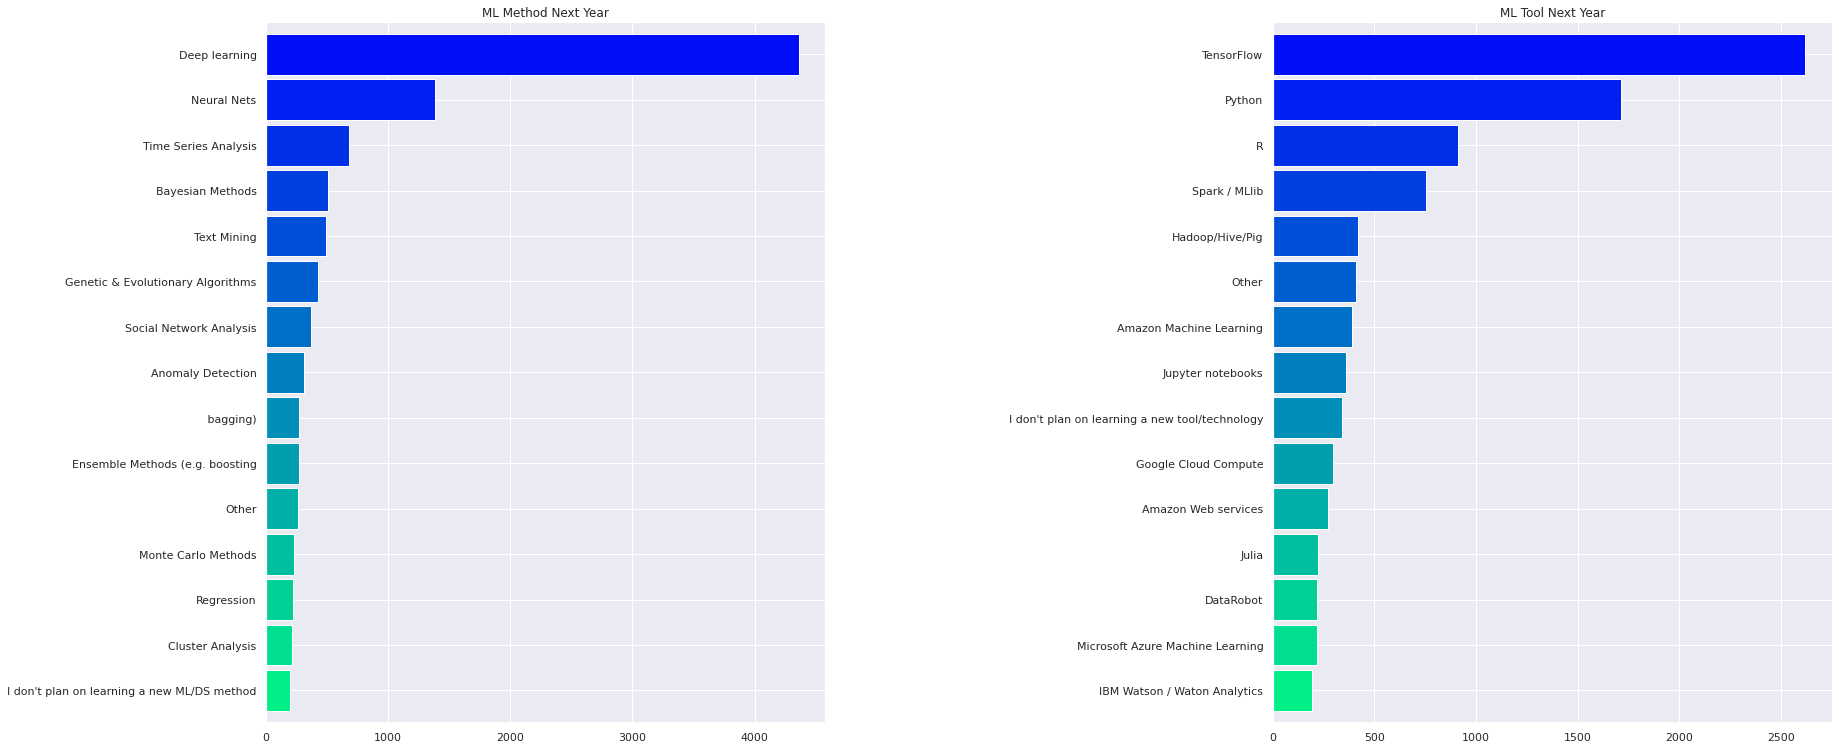

In [51]:
f,ax=plt.subplots(1,2,figsize=(25,12))
ml_nxt=response['MLMethodNextYearSelect'].str.split(',')
nxt_year=[]
for i in ml_nxt.dropna():
    nxt_year.extend(i)
pd.Series(nxt_year).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[0])
tool=response['MLToolNextYearSelect'].str.split(',')
tool_nxt=[]
for i in tool.dropna():
    tool_nxt.extend(i)
pd.Series(tool_nxt).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[1])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('ML Method Next Year')
ax[1].set_title('ML Tool Next Year')
plt.show()

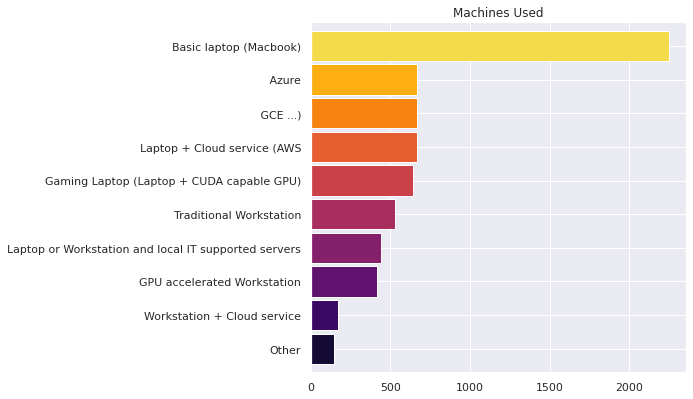

In [53]:
plt.subplots(figsize=(6,6))
hard=response['HardwarePersonalProjectsSelect'].str.split(',')
hardware=[]
for i in hard.dropna():
    hardware.extend(i)
pd.Series(hardware).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',10))
plt.title('Machines Used')
plt.show()


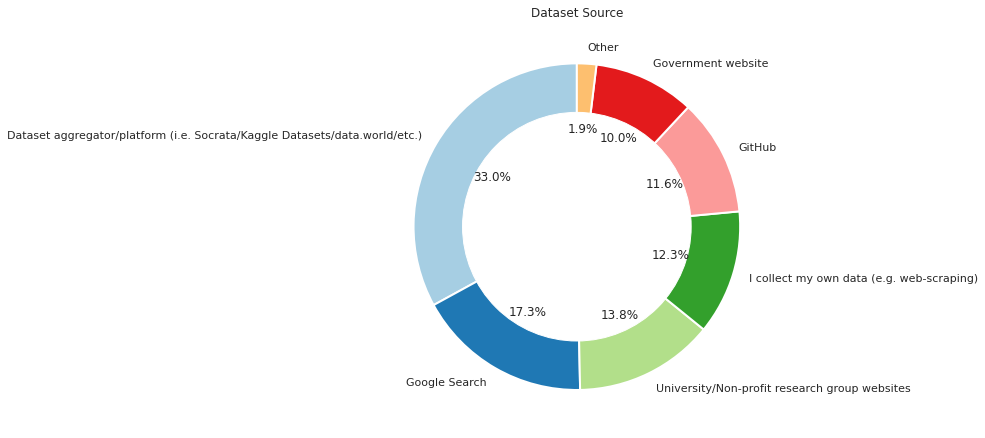

In [55]:
plt.subplots(figsize=(7,7))
data=response['PublicDatasetsSelect'].str.split(',')
dataset=[]
for i in data.dropna():
    dataset.extend(i)
pd.Series(dataset).value_counts().plot.pie(autopct='%1.1f%%',colors=sns.color_palette('Paired',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title('Dataset Source')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

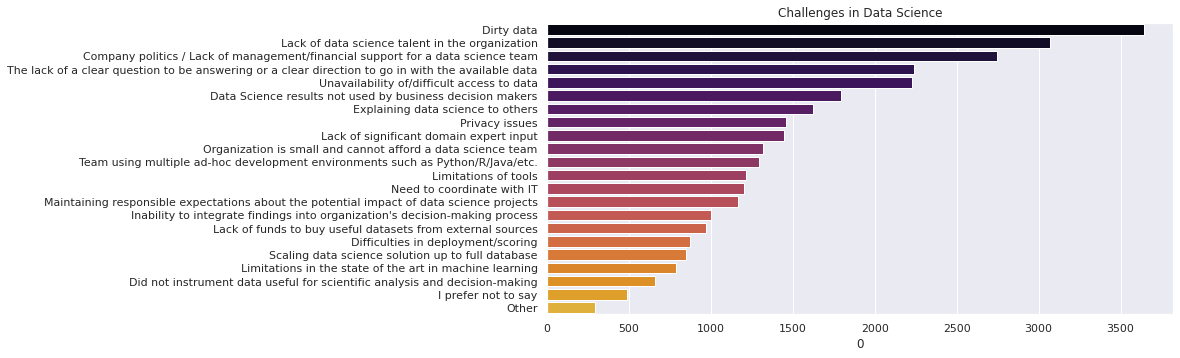

In [57]:
plt.subplots(figsize=(10,5))
challenge=response['WorkChallengesSelect'].str.split(',')
challenges=[]
for i in challenge.dropna():
    challenges.extend(i)
plt1=pd.Series(challenges).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,palette=sns.color_palette('inferno',25))
plt.title('Challenges in Data Science')
plt.show()


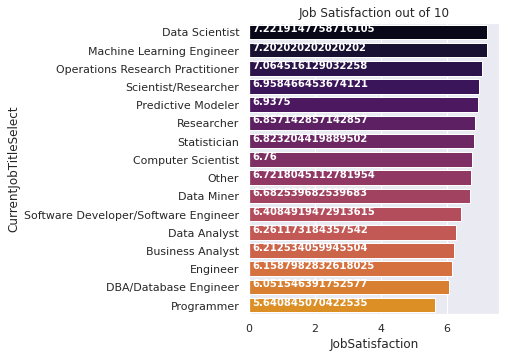

In [58]:
satisfy=response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'],inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=False).to_frame()
ax=sns.barplot(y=satisfy_job.index,x=satisfy_job.JobSatisfaction,palette=sns.color_palette('inferno',20))
fig=plt.gcf()
fig.set_size_inches(4,5)
for i, v in enumerate(satisfy_job.JobSatisfaction): 
    ax.text(.1, i, v,fontsize=10,color='white',weight='bold')
plt.title('Job Satisfaction out of 10')
plt.show()

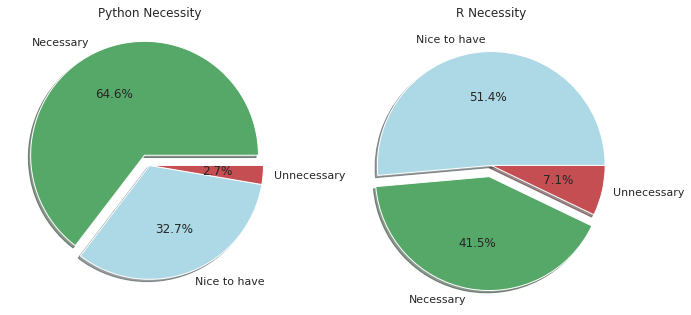

In [60]:
f,ax=plt.subplots(1,2,figsize=(10,5))
response['JobSkillImportancePython'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',explode=[0.1,0,0],shadow=True,colors=['g','lightblue','r'])
ax[0].set_title('Python Necessity')
ax[0].set_ylabel('')
response['JobSkillImportanceR'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0,0.1,0],shadow=True,colors=['lightblue','g','r'])
ax[1].set_title('R Necessity')
ax[1].set_ylabel('')
plt.show()

In [62]:
resp=response.dropna(subset=['WorkToolsSelect'])
resp=resp.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
python=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(~resp['WorkToolsSelect'].str.contains('R'))]
R=resp[(~resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]
both=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]

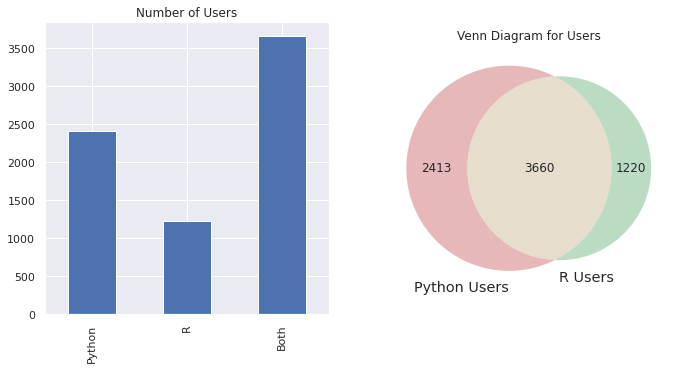

In [65]:
f,ax=plt.subplots(1,2,figsize=(10,5))
pd.Series([python.shape[0],R.shape[0],both.shape[0]],index=['Python','R','Both']).plot.bar(ax=ax[0])
ax[0].set_title('Number of Users')
venn2(subsets = (python.shape[0],R.shape[0],both.shape[0]), set_labels = ('Python Users', 'R Users'))
plt.title('Venn Diagram for Users')
plt.show()

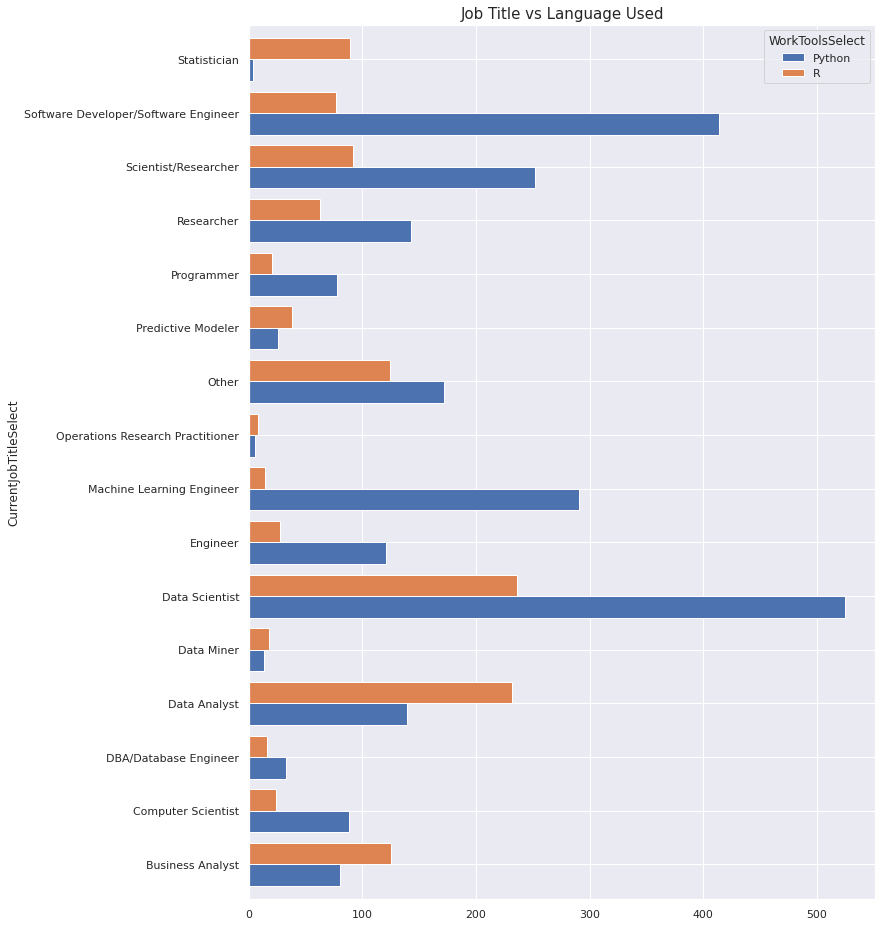

In [66]:
py1=python.copy()
r=R.copy()
py1['WorkToolsSelect']='Python'
r['WorkToolsSelect']='R'

r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['CurrentJobTitleSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('CurrentJobTitleSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Title vs Language Used',size=15)
plt.show()

R beats Python in visuals. Thus people with Job-Titles like Data Analyst, Business Analyst where graphs and visuals play a very prominent role, prefer R over Python. Similarly almost 90% of statisticians use R. Also as stated earlier, Python is better in Machine Learning stuff, thus Machine Learning engineers, Data Scientists and others like DBA or Programmers prefer Python over R.

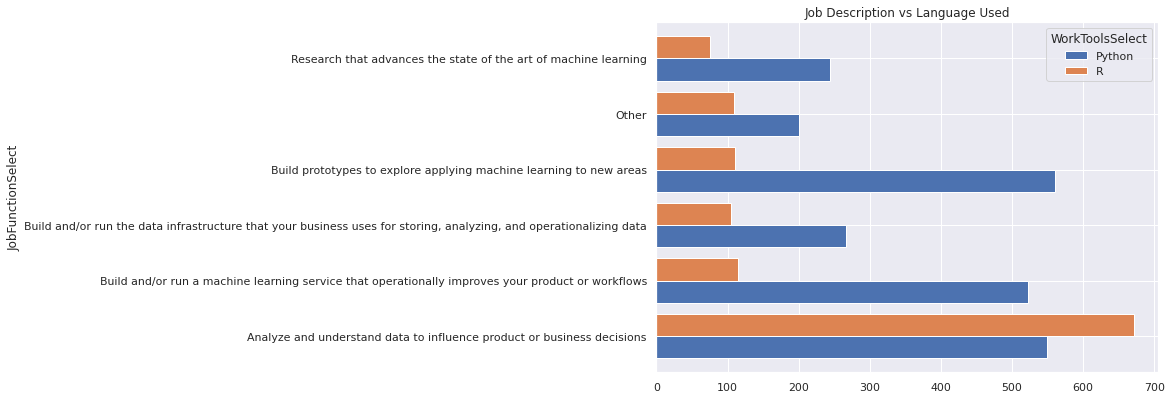

In [69]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['JobFunctionSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('JobFunctionSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.title('Job Description vs Language Used')
plt.show()

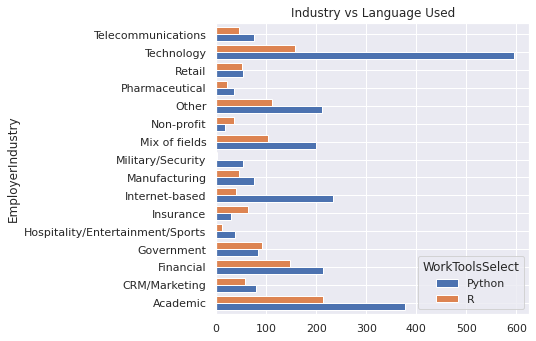

In [70]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['EmployerIndustry','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('EmployerIndustry','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title('Industry vs Language Used')
plt.show()

In [71]:
response['DataScienceIdentitySelect'].value_counts()

No                        5314
Yes                       4257
Sort of (Explain more)    3100
Name: DataScienceIdentitySelect, dtype: int64

In [81]:
true=response[response['CurrentJobTitleSelect']=='Data Scientist']

In [85]:
true['DataScienceIdentitySelect'].isna().sum()

2433

In [87]:
scientist=response[response['DataScienceIdentitySelect']=='Yes']

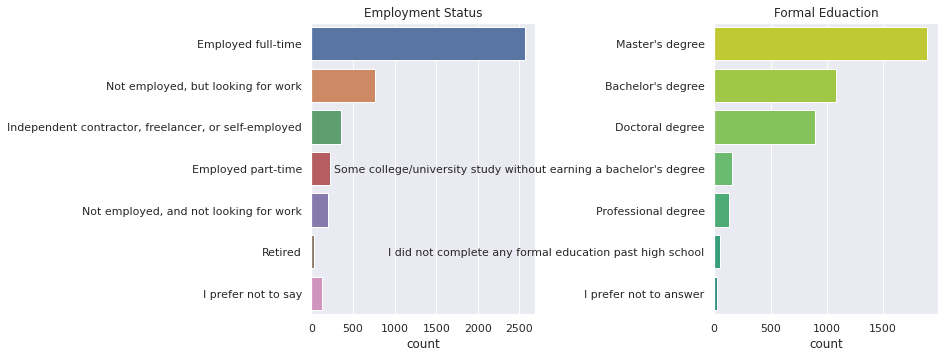

In [88]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(y=scientist['EmploymentStatus'],ax=ax[0])
ax[0].set_title('Employment Status')
ax[0].set_ylabel('')
sns.countplot(y=scientist['FormalEducation'],order=scientist['FormalEducation'].value_counts().index,ax=ax[1],palette=sns.color_palette('viridis_r',15))
ax[1].set_title('Formal Eduaction')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

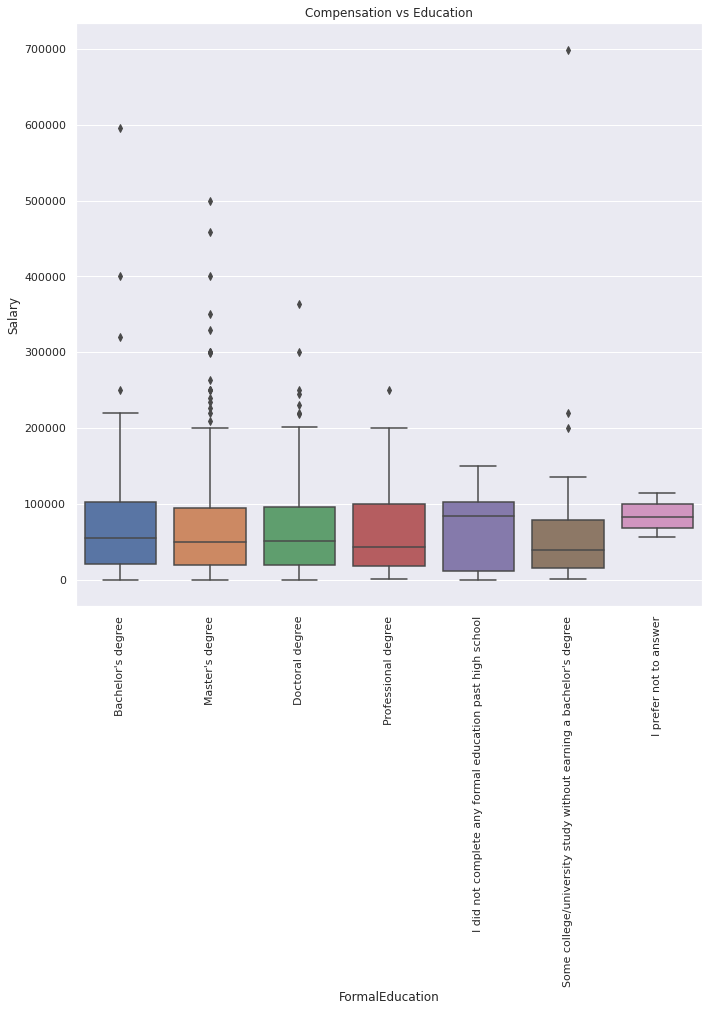

In [89]:
plt.subplots(figsize=(10,10))
comp_edu=scientist.merge(salary,left_index=True,right_index=True,how='left')
comp_edu=comp_edu[['FormalEducation','Salary']]
sns.boxplot(x='FormalEducation',y='Salary',data=comp_edu)
plt.title('Compensation vs Education')
plt.xticks(rotation=90)
plt.show()

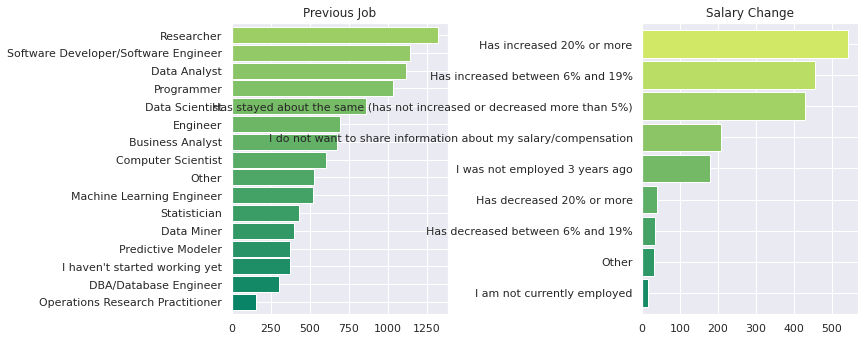

In [90]:
f,ax=plt.subplots(1,2,figsize=(10,5))
past=scientist['PastJobTitlesSelect'].str.split(',')
past_job=[]
for i in past.dropna():
    past_job.extend(i)
pd.Series(past_job).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',25),ax=ax[0])
ax[0].set_title('Previous Job')

sal=scientist['SalaryChange'].str.split(',')
sal_change=[]
for i in sal.dropna():
    sal_change.extend(i)
pd.Series(sal_change).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',10),ax=ax[1])
ax[1].set_title('Salary Change')
plt.subplots_adjust(wspace=0.9)
plt.show()

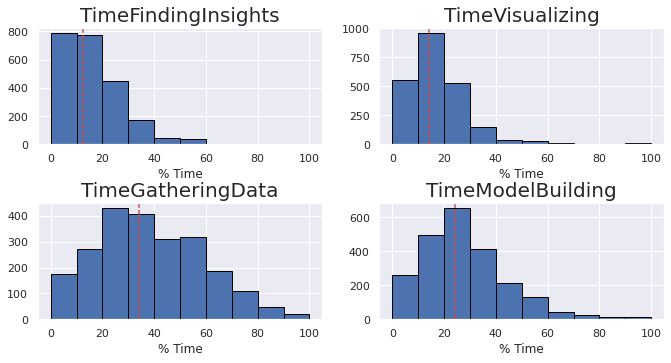

In [92]:
import itertools
plt.subplots(figsize=(10,5))
time_spent=['TimeFindingInsights','TimeVisualizing','TimeGatheringData','TimeModelBuilding']
length=len(time_spent)
for i,j in itertools.zip_longest(time_spent,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    scientist[i].hist(bins=10,edgecolor='black')
    plt.axvline(scientist[i].mean(),linestyle='dashed',color='r')
    plt.title(i,size=20)
    plt.xlabel('% Time')
plt.show()

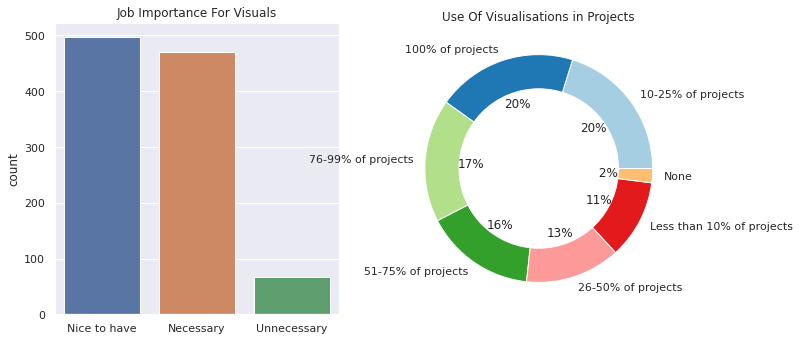

In [94]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(scientist['JobSkillImportanceVisualizations'],ax=ax[0])
ax[0].set_title('Job Importance For Visuals')
ax[0].set_xlabel('')
scientist['WorkDataVisualizations'].value_counts().plot.pie(autopct='%2.0f%%',colors=sns.color_palette('Paired',10),ax=ax[1])
ax[1].set_title('Use Of Visualisations in Projects')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

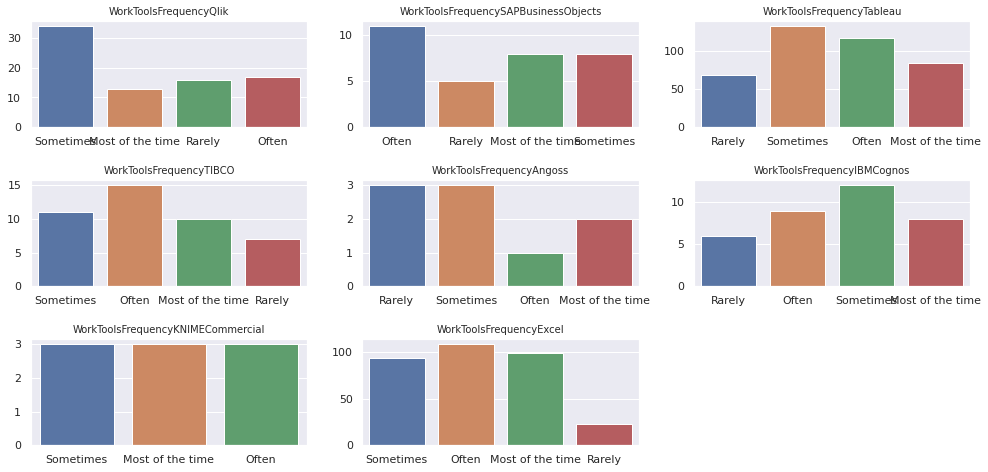

In [98]:
BI=['WorkToolsFrequencyQlik','WorkToolsFrequencySAPBusinessObjects','WorkToolsFrequencyTableau','WorkToolsFrequencyTIBCO','WorkToolsFrequencyAngoss','WorkToolsFrequencyIBMCognos','WorkToolsFrequencyKNIMECommercial','WorkToolsFrequencyExcel']
plt.subplots(figsize=(15,10))
length=len(BI)
for i,j in itertools.zip_longest(BI,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(i,data=scientist)
    plt.title(i,size=10)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

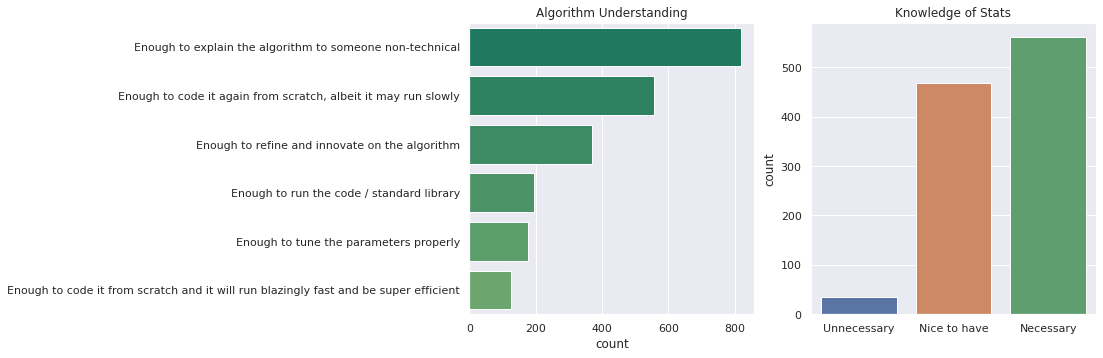

In [99]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(y=scientist['AlgorithmUnderstandingLevel'],order=scientist['AlgorithmUnderstandingLevel'].value_counts().index,ax=ax[0],palette=sns.color_palette('summer',15))
sns.countplot(scientist['JobSkillImportanceStats'],ax=ax[1])
ax[0].set_title('Algorithm Understanding')
ax[0].set_ylabel('')
ax[1].set_title('Knowledge of Stats')
ax[1].set_xlabel('')
plt.show()

Many standard libraries like scikit,tensorflow,keras etc have all these things already implemented. But the experienced data scientists say that we should have a good understanding of the maths behind the algorithms. About 95% of the data scientists say the stats is an important asset in Data Science.

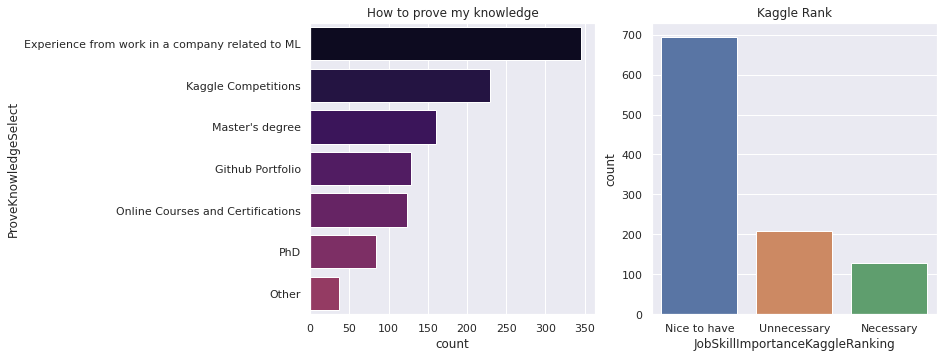

In [100]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(y=scientist['ProveKnowledgeSelect'],order=scientist['ProveKnowledgeSelect'].value_counts().index,ax=ax[0],palette=sns.color_palette('inferno',15))
ax[0].set_title('How to prove my knowledge')
sns.countplot(scientist['JobSkillImportanceKaggleRanking'],ax=ax[1])
ax[1].set_title('Kaggle Rank')
plt.show()

In [114]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
free=pd.read_csv('./freeformResponses.csv')
stop_words=set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### image

In [108]:
kaggle=b'/9j/4AAQSkZJRgABAQAAAQABAAD//gA7Q1JFQVRPUjogZ2QtanBlZyB2MS4wICh1c2luZyBJSkcgSlBFRyB2ODApLCBxdWFsaXR5ID0gOTAK/9sAQwADAgIDAgIDAwMDBAMDBAUIBQUEBAUKBwcGCAwKDAwLCgsLDQ4SEA0OEQ4LCxAWEBETFBUVFQwPFxgWFBgSFBUU/9sAQwEDBAQFBAUJBQUJFA0LDRQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU/8AAEQgCcgJyAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A/VKiiigAooooAKKKKACiiigAooooAKWiigBKKWkoAWikpaACikpaACkoooABS0lFABS0lFAC0lFFAFLW9bsPDekXmqapdxWGnWcTTT3M7bUjRRkkmvgf4sf8FlPhn4N1ybTfCXh7VfGiQ5Vr8MtpbO2cYQtlyPcqPxryn/gsJ+1Hef2jY/Bzw7qTQWiIt5r4t3GZWOGigYjnA+8R3IX0r8taaQH6wWH/AAXB053xe/Cm6hXPWDWFkOPxiWt6P/gtv4GMBMnw78QrN2VZ4Cv57h/KvyBop2A/S34of8Fq/FGrRTW3gPwRaaCGQqt7qtx9plDEfe8sKFGPQk18h/Ef9tj41fFOcPrfj7VVhUkraWUxggBP+wpxXh1FFgNbV/Futa+xbUtVu75j1M8zP/OrGk+PPEehY/s7XL+yx08idlx+RrBooA9p8E/tm/Gv4fOf7H+I2uxwkgm3nu2liP8AwFiRX0F4C/4LCfGnwxtj1220bxTbgjieAwSY9N6f1Br4UoosB+yfw0/4LRfDfXjDb+M/Cmt+F7hgA1xZ+XeW6n1Jyr4+iGvr34X/ALVHwn+Mqxf8Ij450rU55Vytq8hgnPGcCOQKxI9h2r+a+rFjqF1pd0lzZ3M1pcxnKTQSFHU+xHIosB/U6ORS1/Pt8IP+Cj/x3+D2yG18WnxJpq4/0DxHF9rTA7b8iUfg9ffvwC/4LDeBPGxtNN+I+mN4M1N8K1/blpbJmx1IOWjGfUt9aVgP0LorB8F+PfDvxF0SHV/DOs2WuabKAVubGZZF/HHQ+xrepAFFFFABR3oooAKKKKAFpKKO9ABRRRQAtJRRQAUUUUAFFFFABS0lFABS0UlABS0lFABRRRQAUUUUALSUUUAFBoooAWkpaSgBaSiigBaKSigBaKT8KKACiiigBaKKSgAooooAWkoooAKKKKAClpKKAClpKKAFopKKAFpKKKAFpKKKACiiigBaKKKACvPvjz8ZdG+AXwr17xtrbg2unQFo4N2GuJSPkjX3J/rXoFfjF/wVt/amf4i/EuH4YaDdZ8O+G/mv2Q8XF8eoPqqLsA9y1AHwt498bar8SPGmteKNcuGutV1a7lvLmVjnLuxYgeg54FYFFFWAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB1fw5+Kvi74Sa4useD/EOoeHtQGN0thcNFvA7MARuHJ4NffnwG/4LLeJvDcNtpvxQ8PjxNbIAp1XTCsV0Bnq0Zwrce4PFfmxRSA/o9+Bn7Ynwm/aIgA8H+K7ebUQAZNLvla1ukPoEkA3/AFQsPevaK/ll0vVr7Q76K9068nsLyIho57aQxup9QRyK+0PgB/wVg+LXwlWz03xObfx/oEJ2lNR/d3ipnOFnXqfd1alYD9y6Svm79nj9v34S/tE+RZaZraaJ4hkXJ0bVnEUrHIBEZPD8kdOfavpEHIyDkUgCiiloAKSiigAo7UUUAFFFFAC0UUlABS0lFABRRRQAUUUUALSUUUAFFFFABRRRQAUUUtACUUUUALSUUUAFFFFABRRRQAYooooAKKKKACiiigAooooAKKWigBKKKWgBKKKKAFopKKAFopKKAFoopKAFpKKKAClpKKAFpKKKAPIv2sPjfZ/s9fAbxT4yuZALm3g+z2Me7DS3Mh2RhfcE7j7Ka/nD1nVrnXtXvdSvZWmu7yZ55pGOSzsxJP5mv08/4LXfFeSa/wDAvw6t2YQxCTWLvD8M+PLiGPYNIc+9flvVIAooopgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQA5HaN1dGKspyGBwQa+tv2Yf+Ck/xP8A2fJoNO1LULnxt4UDKG03VrlpZIUHUQyMSUGOi/d9q+R6KQH9HP7Nf7X/AMOf2o9GM/hLVtmsQxCW80O8Ux3dtzgkqeHUHA3ISORnGa9sr+YT4Y/E/wASfB7xpp3irwpqUul6zYSb45Yzww7qw/iUjgj3r97P2HP2vbH9rf4Xy6pLaxaX4p0mVbXVdPjk3KGKgrMmRnY/PHYqw56lAfR9LSUUgFpKKKACiiigBaSiigBaSiigApaSigBaSiigBaKSigAooozQAtJRRQAtJRRQAtJRRQAtJRRQAtIKKKAFpO1FFAC0UmfaigAooooAKKKWgBKKKWgAoopKAClpKWgBKKWigBKWiigBKWiigAooooAKSlpKACiijFABRRRQB+B3/BUfxHc+If2xfFazytJHYRQWcSE5CKi9AO3JJ/GvkuvqX/gplpL6T+2P44V8/wCkPFcjPo65FfLVUAUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvbP2Qf2hdV/Zu+NmieJbO8lg0uWVLfVbdSSlxbFhuDL3I6g9R2rxOlBwaQH9UFrcxXttFcW8iTQSoHjkjYMrqRkEEdQRUlfk7+yZ/wAFctN8HeFPDPgb4leHbr7JpdpDp8fiOwuBK5SNAiGWFlXsBlg5Psa/TH4ZfGDwd8Y9Aj1nwd4gs9csXAJNvIC6Z7Mp5U/UVIHY0UUUAFAoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAWikooAKKKKACiiigAopaKACkpaKAEpaKKAEpaKKAEopaKAEopaKAEopaKAEopaSgAooooAKKKKAPyR/4LU/CE6b4r8GfEe1gAg1GN9KvZVTH71BuiyfdA/wD3zX5kV/R5+2L8D4f2hP2efFfhHan9oPCLywlcH93cRHeuMf3gGT6Oa/nM1LTrjSNRurG7jMN1bStDLG3VWU4I/MVSArUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArr/AIZfFvxh8G/EkOu+DPEF7oGpRMD5lrJhXx2dDlXHswIrkKKAP2K/ZL/4K2eH/HTaf4b+Ln2fw1rbgRLryLss7h+gMgHERPc8Lk9hX6K2V7b6lZw3VpPHdW0yCSKaFw6Op5BUjgg+tfywV9X/ALIX/BQvxx+y/dppd0X8UeCpCBJpFzKQ1vzy0DH7px1HQ8elTYD99qO1eY/AP9o3wP8AtIeDbbxD4N1RbhXQG4sJ8LdWjd0kQE4IPcEg9jXp3akAUUUUAFA6UUUAFFFFABRRRQAUd6KKACiiigAooxRQAUUUUAFFFFABRRRQAUCiigAooooAKKMUUAFFLRQAlFLRQAlFLRQAlFLRQAUUlLQAUUUUAFJS0UAJS0UUAFJS0UAFFFIaACiiigApaSigAr8UP+Cs/wCzCvwq+LsPxA0Gx8jwz4pXfcLEv7u3vl4kHsHXYw/2i9ftfXnnx9+CWg/tB/C3WfBfiCFXtb2I+TPjLW04B2Sr7qT/ADoA/mdoru/jb8GPEvwD+I2reDfFNmbXUbGVlSUA+Xcx5O2WM91YYI788gGuEqwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAO5+D/AMa/GXwI8Y2niXwXrc+kajA4ZlQ7op17pIh+V1I4wR9MGv2w/Yt/4KGeE/2nbKHQtYkt/Dvj+NBv0122x3nHLwE9enK5JGa/BarOnajdaRf297ZTyWt3buJIpom2sjDkEGlYD+p2kr81/wBg3/gqBp3jCz0vwB8Wrw2PiIMttZeI5ceReA8Ks56o/QbuQepI5r9JkdZFV1YMpGQwOQRUgOooooAKKKKACiiigBaSijtQAUUUdqAA0UUYoAKKKKAFpKKKACiiigAooFFABRRiigBaKbiigB1FFFABSUtJQAUUtJQAUUtFACUUUtABRSUtABRRSUALSUtFABRRSUAFFLRQAlFFFAC0UlLQAlFLRQB+Tv8AwWk8WeBbnV/Cfh+Gx834gWw+0T30Z2+VaMDtjcY+bcTkdxivy7r6f/4KVR3sX7ZPj4X3mbzNG0fmHJ8ooNmPbbjFfMFUgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAqsUYMpIYHII6iv0Z/YP8A+Cnmp/DybT/AfxVu21TwtgQ2WuS5NzY8gBZG/jj9zyPU9K/OWikB/Uzo2s2PiHSrTU9Nu4b7T7uNZoLmBw6SIRkMCOoNXK/Bf9iL/goN4k/Zau4vD+rifXvh9NPvl08tuks8n53gycDOcleAT9a/cT4efEbw58VvCVh4m8K6rBrGi3yCSG5gJ/JlOCrDuCARUgdJmiiigAooooAKKDRQAUUUUAFFFFABRRRQAUUUdqACiiigAooooAP50UUUAHNFGKKAFooooASilpKAFpKWkoAKWiigBKWiigBKWikoAKWiigBKWiigAopKWgBKKWigBKKWkoAKKKKAFpKWkoA/JL/gtH8FX07xT4V+J1opa31BP7KvsJ92VF3REn3UMOfSvzHr+mD9oL4I6H+0P8J9d8Da+mLXUIgYbgDL206kNHKvuGA+oyO9fgD+0d+yv49/Zm8X3Ok+KdHuBp28/YtZijLWt3HnhlccA+qnBHpTQHjtFFFUAUUUUAFFFbuh+A/E3iYqNH8O6tqxbp9hsZZs/wDfKmgDCor2zwv+xR8dvGEaSad8K/Ewjf7r3lg9qp/GXaK9d8Lf8Em/2hNe2Nf+HrDQI2/ivNUtnIHuI5GNK4HxtRX6WeEv+CJvjC6hEniPx9pFixP+psIJJSB7swAz16V32nf8ERNB4+3/ABK1H3+z2Uf9aLgfkrRX7R6Z/wAEX/hBaIouvEnii/YDkvPCgJ+ixitS5/4I4/BGWMLHe+IoGx95b0E/qpouB+JFFfr142/4In+ELsb/AAr471bT3248rUoo5lz67lAP4V8N/tO/sB/FD9mKKbVNVsE1vwosmxdd0074lGePMTO6PPqwAz3NFwPmmiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9KfsZfts+Kf2T/GUZjd9X8F3rhNS0WVjjaT/rYj/DIv4gjII5BHzXRSA/p1+E3xZ8M/GzwNp3izwlqUWp6ReLw8bDdG4+9G4/hYdwa7Cv50/2TP2vvGH7J/jF7/RJ3vdBvWX+0tFlc+RcAfxBc4DgcBuvav3n+BPx88H/ALRPgS08UeD9SS8tZFAntmOJ7SQjmOROoI556HHGakD0WiiigAooooAKKKKADNFFFABRRRQAUUUUAFFFFABRRRQAZozRRQAZFFFFABS0UUAFJS0lAC0UUlAC0lLRQAlLSUtABRRRQAUUUlAC0lFLQAUUUUAFFFFACUUUUAFLRRQAUlFLQAlZ2v8AhvSvFWnSafrGnWuqWUgw1vdxLIh/AitGigD5k8df8E3fgB48nlnm8EQ6PcS8vJo8ht8n1xyB+Ved3P8AwR6+AVxIjqfFMIVslY9UTDD0OYj+lfb9FAHxxpv/AASc/Z+07bu0jV7zH/PzqG7P5IK6vSf+CbP7PGlOjf8ACvrW8KEEfa5pHB+oyM19OUUAea+Hv2aPhT4UCDSfh94fsQvTy7BOPzFegWmk2OnwpFa2VvbRIMKkMSqqj0AA4q1RQAYxS0lFAB0opaSgAooooAKwvHfgrSviP4M1rwvrduLrSdXs5bK5jIGSjqVJGehGcg9jW9SUAfzS/tG/BfUP2f8A4x+I/BOoEyHT5z5E5TaJoW5RwMngj37V5pX6tf8ABar4LxNZeCvifYWe2ZZJNG1OdE+8CPMtyxHptmGT6gV+UtUgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV7B+zL+0/4v/Zd+IFr4j8Nz+faE7L7SZ2PkXkR6q2Oh7hh0IHXpXj9FID+k79m39pLwn+098O7fxR4XuArKRFfadIwM1nNgEo/tzwe4r1ev5sf2bv2kPFv7MnxCt/E/he8dUYql9pzOfIvYgfuSL0OOcHqMnGM1+/f7Of7RvhH9pj4d2Xinwteo7Mire6c7Dz7GbHzRyL14OcHoRyKQHqdFFFIAooooAKKDRQAUUUUAFFFFABRRRQAUUUUAFFFFAC0UlFABS0lFAC0UlFAC0lFFAC0lFFAC0lFFAC0UUlABS0lLQAUUlLQAUUUUAFJRS0AJRS0UAFJRS0AJS0UlABRRRQAtJRS0AJRS0UAJRS0lABRS0lABRRRQAUUtJQAUUUUAeI/tofCRfjV+zZ408OKub37Ibu0bbuKzRfMMD3AYfjX85UkbRSMjqVdSVZT1B9K/qhkjWWNkYZVgQR6g1/OH+2X8N0+Ev7UPxH8MxRmK2t9Ve4t0IxiGdVnjA9gsqj8KaA8YoooqgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAr179mX9pjxV+y/8AEey8T+HZjNbBgl/pcjkQ3sJ+8jehxyG7EA89K8hopAf0rfs8ftC+FP2k/h7aeKvC11uRsJd2UjDzrSXGSjj+R7j8a9Pr+b79l79qDxb+y38QYvEHhy7drGYrHqWlucwXkQPRl9Rk4YcjJ55Nfvz8APj74U/aN+Hen+LfCt9HPDOii5sy4M1nNj5opF6gg5+o5HFSB6RRRRQAUUUUAFFFFABRS0lABRRRQAUUUUAFFFFABmilooASilooASiiigAxRS0lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAtFFFACUtJS0AFFFJQAUtFJQAtFFFABRRRQAUUUUAJS0lLQAlLRRQAlLSUUAFFLSUAFfjT/wAFnPhmdA+N3h7xlAii217TVinbHJniyn/osJ+tfsvXwn/wWD+G6eK/2ZYfEkdsZbvw3qUU/mLnKRSkRPn2yy0AfiLRRRVgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV7b+yj+1N4l/ZY+JFn4g0iSS60iSRU1PSt+Eu4M/MPQMByD2IFeJUUgP6c/hH8W/DXxu8Cab4t8KX632k30YZTwHibHKOuTtYdxXZ1/Pl+w9+2Zrv7KHxAy8sl94J1R1TVdKY5UYPE0f911yenBB5zgY/e7wJ450T4leEdK8TeHb6LUtG1KBZ7e5ibIZT2PoQcgjsQRUgb1FFFABRRRQAtJS0lABS0UlABRS0lABRS0lAC0UUUAFJRRQAtJS0UAJRS0lABRRRQAUUUUAFFLSUALSUtJQAUUUUAFLRSUAFFFLQAlLSUtACUUtJQAUtFFABRRRQAUlLSUAFLRRQAlLRRQAlLSUtABRSUtACUYoooAKKKO9AC15X+1R4F/4WT+zj8SPDqpvnvNBvBbjGf3yxM0X/AI+q16nSSRrKjI6h0YYZSOCKAP5XZEMUjI3VSQabXon7Q/w+f4V/G/xr4UaFoBpmpywoj/3M5U/QgivO6oAooopgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9n/8E9v28bv9mTxHH4V8TPLd/DrVLkGYL8zadIxAM6DuvQso5wMjJ4r4wopAf1M6PrFj4h0u11LTbuK+sLqNZYLiBgySIRkEEdRVw1+Mv/BND9va5+FfiG0+Gfj3Ug3gu/cR6dfXTHOnTn7q7v8Anm3TB6HBGOc/sxFKk8SSRuHjcBlZTkEHoQakB1FFLQAlFFFABRS0lAAKKKKACiiigAxRS0UAFFJRQAUUUUALSUUUAFFFFABRRRQAtFJRQAdKWkooAKKKWgBKWikoAWiiigAooooASlpKKAFpKKKAFopKKAFoopKAFooooAKKKSgBaKKKACikooAWikooAWikooAWkoooA/Db/grp8Pn8IftUyauqqLTxBpsN4jDvIpZHB9+F/MV8R1+tv/BbnwGlx4L+G/jOOLElnqFxpM0gH3hNGJUB+n2d8fU1+SVUgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV+uH/AASy/bng17SbL4PeO9TK6va/u9Avrk5FxHk4t2c/xLnC56jAHQCvyPq1pmp3ejahbX9hcSWl5bSLLDPC2143ByGB7EGkB/U3RXyH/wAE+P22bP8Aah8DLouuSw23xB0a3X7dCpwLyMYX7QgPqSNw7FvevrypAKKKKACiiigApaSigAooooAWikzRQAUUtJQAUUUUAFFLSUAFFFFABmiiigAooooAKKKKACiiigAooooAKKKKACloooASlopKAFpKWkoAWkoooAWkpaKACiiigBKWkooAWikooAKWkooAWkpaSgAoopaAEopaSgD5a/4KYfDt/iJ+yF4uSCET3ekNDqsCcZ3I2xiM+iSOfwr+f+v6h/H3hm38Z+B9e0K6Uvb6jYzWzgdfmQjj35r+Y3xXoM3hXxRrGi3AIn068ms5Awwd0blD+opoDKoooqgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDsvhB8V/EPwR+ImjeMvDF49lq2my71KsQsqHh43HdWUkEe9f0Hfsp/tM+Hf2pfhZZ+KNFlWG/i/0fVNNJ/eWdwBypHdSPmUjgg+oIH839e7fsf8A7VWvfsqfFC212wZ7vQbpli1bS92FuYc9R6OATg/zpMD+jCisXwb4x0f4geF9M8RaBfR6jo+pQJc21zEcq6MMg+x56Vs1IC0lLSUAFFFFABRRRQAUUtFACUUtJQAUUUtABSUtJQAUUtIKACiiigAopaSgAoopaAEoopaAEooooAKKKWgApKWkoAWikooAWkpaSgAooooAKWikoAWiiigAoopKAFpKKKAClpKWgBKKKKAFopKKACiiigAr+fL/AIKO/D5vh5+2L8QbdIvLtNSuY9VgYDAfz4kkkI/7aNIPqK/oNr8kv+C2Hw3Fp4y8CeOYoyBe2T6VMwHBaJ2kUn3xJj8KaA/MeiiiqAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD9D/APgld+2k3wz8WW/wp8XX4TwtrMxGmXVw+FsrpuiZPRHPH+8Vr9lgQQCOQec1/K9BPJazxzQu0csbB0dTgqwOQRX7sf8ABNL9rpP2ifhMfD+uTonjXwyEtrhS+Wu7fH7ucA854ZWHP3Qc/NgSwPsmiiikAUUUUALSUUUALRRRQAlFFFABRRRQAUUUUAFFFFABRRRQAUUUc0AFFFFABRRRQAtJS0lABRRS0AFFFFACUtFIaAFpOlLSUALRSUtABRRRQAUUUUAFJS0lABRRS0AJS0lFAC0UUUAFFJS0AJS0UUAJXx5/wVW+G7ePP2Sdcv4U33fh6eLU1+XJEasBJ9PlJP4V9h1gfEHwbZfETwNr/hjUFD2OsWM1jMGGRtkQqTj2zmgD+XmitLxJ4fvfCmv6ho2ox+Tf2E7288f911OCKzasAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvS/2dvjlrn7O/wAV9F8Z6HOySWkoW5gH3biAn542HoRXmlFAH9Qnw88e6P8AFDwRonivQLkXej6vaR3ltKOux1BwR2YdCOxBFdDX5S/8Eef2ovJu7n4La3MxE/m3uhO3OGCl5oevorOPoa/VqoAKKKKAClpKKAFooooASiiloASiiigAooooAKKKKACiiigAooooAKWkpaAEoopaAEopaSgApaSloAKKSloASloooASilooASlopKACilpKAFpKKWgApKKWgBKKWkoAWiop7qG1QvPNHCn96Rgo/WuJ8TfHf4deDZzDrXjbQ9PmAyYpb6PePqASRQB3dFeIah+218C9Lz9p+JuhpjrtkZv5KapWv7eXwAvWxD8UdFY+/mr/NKAPe6K8v8PftRfCXxVII9M+IWgXDk4CteLGSf+BYr0Wx1ex1MZs723u++YJVf+RoAt0tFJQAUUtJQB+C3/BUr4Vn4bftX67eQ24hsPEca6tEyDCs7ZEn0ww/WvkOv2A/4LVfC/8Atb4Y+CfHVtbh59I1F9OuZFHzCGeMsCT6B4QPq/vX4/1SAKKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAdT8LfiHqfwn+I3hzxjo0rQ6lot9FeREfxbW+ZD7MuVI9Ca/pR+FPxF0v4t/DrQPF+jTLPp+rWqXCMjBtpI+ZTjuCCD9K/mFr9ev+CL3xrOueBvFvw0vpma60edNUsQ5zmCUbJFHsrIh/wC2lSwP0rooopAFFFFAC0UlFABRRRQAUUUUALSUUUAFFFH40AFFFFAC0lFLQAlFFFABRRRQAtJRRQAUtJRQAtFFFACUtFFABRRRQAlLRSUALSUtFABSUtcV8VvjL4N+CPhiXX/GmvW2h6anAaYlnkb+6iKCzHjsKAO0rm/HvxI8LfC7Q31nxbr+n+HtMQ4+06hcLCpPoNx5PsK/LX9pH/gsdq2sS3Wj/CHSW0my5T+3dVRTPJzy0cQJCg9iTn2FfnX47+Ivib4na7JrPirXL7XtTkzm5vpmlfnsCT0p2A/Yf40f8FhPhh4Ia5svBNhd+N7+PCrcKDBaZ9dzDLAewr4r+J//AAVu+OvjoTwaLe6X4Ks3OANJsleXb7vN5hB91xXxTRTsB6D4v/aD+Jvj26M/iDx74h1Ryu3E2oy7AMk4ChgoHJ7VwU88lzK0k0jyyMcs7sST9SajopgFFFFABXV+Evix418BXcV14c8W63oc8f3WsL+WHHthWAI9jXKUUAfXvwu/4KnfHz4dXKC/8RW3jHTxgG0120R+O+JIwkmfqxr7i+CP/BYn4d+NJLWw8eaTceDL+RhG15GfPtCT/ET1QfXNfjBRSsB/UX4P8baB8QNDg1nw1rNlrmlzgGO7sJ1ljb8VJ59q2q/mQ+E/xn8Z/BDxNHr3gvXrrQ9QXhzbuQkq/wB116Mvsa/Un9l7/gsB4f8AFTWWgfFyx/4R3U3IjXXrJC9nJwMGRB80ZJz0DD6UrAfaP7Uvwlt/jh8AvGXg+aISS3ti0ltnqs8ZEkZB7fMoH0Jr+bjU9Pn0jUruxuUMdzayvBKh/hdSQR+YNf1IaPrVh4h0231DS7231GwuEDxXNrIJI3UjIIYcEV+Cn/BTf4PN8JP2svEjwxFNL8RpHrtqwHBMuVlH182OU/Qj1oQHyjRRRVAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9DfsEfGG4+C37UHhDVUnEVhfzjS79WJCvBKQCD9GCke4r55qW2uHtLmKdDh43DqfcHIpAf1QUV5T+yn8R/wDhbX7OPw78VPIZbm+0a3F05Oc3CII5v/IiPXq9SAlFLRQAlFLRQAlFFGaACiiigBaSiigAooooAKKWkoAWkoooAKKKWgBKKKKACiiigAooooAKWiigApKWigAoopKAFpKWigApCQoJJwB1Jqtqmq2eh6bdahqF1DZWNrG009zcOEjiRRkszHgADvX5G/t7/wDBT2XxzHe+APhJe3FnoeXh1DxDGWikvB02Q9GVOuW4JyO3UA+nv2wv+CnXg/4BrqPhvwYbXxf45jQphJN9lZSf9NWQ5YjugIPYkV+O/wAZvjz44+P/AIpl1/xvrs+r3rf6uM4SCBf7scY+VR+vrXAEkkknJPekqrAFFFFMAooooAKKKKACiiigAooooAKKKKACiiigD6L/AGW/25/iP+y9q8KaVf8A9s+F3YC50HUSXhZfWM5BjYDoQceoNfVn7fHxF8A/tn/s3aF8UfBlzjxF4Yn8jU9KcgXFvDLyQ4xkqpDEMODuNfmRVmy1O700Ti0uprYTxNDL5TlfMjb7ytjqD6UrAVqKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH7Zf8Ec/iEviX9mi+8NSSs0/h3VZolRu0Up80Y9tzvX3nX46f8EW/iKNG+L3izwfM37vWdPFxAM/8tYjk8f7mfyr9jKlgJRRRSAKKWigApKWkoAKKKWgApKKKACiiigAooooAPxooooAKKqanq9jotsbjUb23sLcdZbqVY0H4sQK8m8aftkfBH4f7xrXxO8OxOn3orS8F3IPqkO9v0oA9kor491//AIKw/s6aO7ra+KNQ1kr3stHulB+hkRK466/4LMfBGAny9I8W3OP+edjCM/8AfUooA+86K+AI/wDgtL8GHchvDHjSMf3mtLXH6XFa2n/8FjPgVeSqs9t4nsVPV5tOVgP++JGNAH3TRXyx4Z/4Kd/s4+JmEa+Pxp0xx+71DTLuEf8AfRi2/rXt3g/47fDn4gRRv4c8deHtaL8CO01OF5M+hQNuB9iKAO6opAcjI5FFAC0UlFAC0UUlAC1Be3kGnWk11dTJb28KGSSWRtqooGSSewqavyT/AOCp37c0+sazcfCDwHqrx6ZaAp4gvrRyvnzZ/wCPYMOqqPvY4JbHO3gA87/4KJ/8FBr/AOOGtX/w/wDAt49n4BspjFc3cLEPqzqcZJ7RZHA/iwCfSvgqiiqAKKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH0T/wAE+PGLeCf2w/hldrIY1u9TXTW5wGFwpgwf+/lf0O1/L78NfEX/AAiHxG8K69v8v+y9VtL7f/d8uZXz/wCO1/T1YXKXljb3EbrJHLGrq6nIYEZBBqWBPRRRSAWiiigBKKWkoAKKWkoAKM0tIaACiisnxV4u0TwNoVzrXiHVrLRNJthumvb+dYYk+rMQM+1AGtWX4j8UaP4Q0yTUdb1O10mxj5e4vJljQfiTX5yftLf8FiND8PvfaJ8ItO/t29TMQ1++jK2qtnG6JDy/sWGD7ivzJ+LPx++IXxy1V7/xv4s1PXnLb0t7ic/Z4jz/AKuEYROv8IFOwH6/fG7/AIK5/Cf4Z3Vzp/ha0u/H+pw5BazlFvZlgcYExVifwQiviH4pf8FdvjX45lni8Pf2X4HsHBVFsIfPuFHvLJkE+4UV8P0U7Adt43+Nnj74kXX2jxN4v1fWZOSPtN2xUZ64UEAflXFs7OxZiWY9STkmm0UwCiiigAooooAKs2eo3enPvtLqa2f+9DIUP6VWooA97+FH7dHxr+DbRR6D42vJ7GNdgsNTAuYCOOzcjp2Ir7Y+C/8AwWrdmt7H4oeCY1HAk1fw7MRx6/Z5M8/9tB9BX5WUUrAf0ufBz9oz4d/HrTPtngnxPZ6wVXdLaq4WeEZx88Z5HNek1/Ld4Z8U6z4M1m31fQNVvdF1S3bdFeWE7QyofZlIIr9Cv2Wv+CvPiXwe9tofxdjl8UaSCqLrcCKLyFfVwAPNHv8Ae9zSsB+xFJXIfC/4veDvjP4ag17wX4hsdf02VQS9nMrNET/DInVG/wBlgDWt408YaV4A8J6t4j1u7jsdJ0y2e6ubiVgqoijJ5NID5U/4KR/tgj9m34Utonh+4UeO/ESm3s8NzZwHiS4I9QPlX3YHtg/hLfXtxqV5Pd3Uz3FzO5kllkOWdickk+pNenftN/HzV/2kfjDrvjPVJJVguZmWws5HyLW2BPlxgdBhcZx1OTXlVUgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFf0q/sveLY/Hf7PPw+12KUTC80a3YsDn5ggVh+BBFfzVV+9H/BKvxYvij9j3w9EJlkfSru409lDZKbSrAEduHz+NSwPr6koopALRSZ96KACiiigAooooAKKK/On9v/AP4KYW/wta58A/CnUbbUPFLIU1DXICs0Wn5/gjPKtL1z1C/XoAe9ftcft7eBP2VtPmsZz/wkXjN4i1toVpKFKkj5WmfnYvToCfavxd/aI/a2+Iv7TOuNd+LNYkGnIxNtpFqSlrAOei9zz1PNeTa5rmo+JtXu9U1a9n1HUruQyz3VzIXkkcnJLMeTVGqsAUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigD0z4CftEeNf2cfG1r4l8H6k1vLGcT2UxLW91H3jkXPIPtyDg19Y/te/8ABTUftHfs/aR4P0jRrnw7q99MT4gTzA0JRNpRYm6srksSCBjaBz1r4CopAFFFFMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACv10/4Ij+L/ALd4F+JXhpn5069s7xEJ6+csykj/AL8j9K/Iuvvv/gjR46/4R79pDXfD0rlbfXtDcKM9ZoZUZP8Ax1paTA/aqiloqQCiiigBKKKKACiivj//AIKNftjx/szfDYaLoV0q+PdfhYWIXDNaQ52tOQffIXPUg+lAHiP/AAUy/wCCgS+D7fUPhP8ADrUSdclDQa3qtuRi1Q8NAjA/fPIb0GRX5FyyvPK8kjF5HJZmY5JJ7mpL29uNSvZ7u7nkubq4kaWWaVizyOxyzMTySSSSagqgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV7H+yF8Xbf4GftGeC/GV87JptjdlLwou4+TIjI3GR03Z/CvHKKQH9SfhvxHpni/QLDW9GvYtR0q/hW4trqE5SRGGQR/h2rSr8rP+COn7TN9c3epfB7XtSe4t0ja90GOdwTHjLTQp3x1fHb5q/VSpATNFLRQAlFFFAGB4/8caT8NfBes+KdduRaaTpVs9zcSt/dA4A9STgAepFfzkftJ/G/U/2h/jJ4g8bamzgXk2y0gZsiC2UkRxj0wOfqTX6cf8Fk/j6/hj4a6L8LtNm2XXiKZbzUSuc/ZYWDKmf9qQIfonvX48U0AUUUVQBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeofsxfExvhB8f8AwF4saUxWun6xbPeMDgm2MqiYfihYV/SnDMlxCksbB0dQyspyCDX8rlf0lfsleMx8QP2avhxrrStNNc6JbeczdfNVAr/qDUsD1yikopALSUVQ8QaxD4e0LUNUueLeyt5LiTnHyqpY/wAqAPwA/wCCinxWk+K37WPja4WdprHSLptHtgT8oWAmMlR6EqT75r5orR8R65ceJ/EGpavdnddX9xJcyn/adix/U1nVQBRRRTAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr9/wD/AIJlmc/sb+B/PYt8suzPZN5wK/AEAkgAZJ7V/SB+x78Nrj4Tfs1+AfDV6xa+ttMie4yu3bI43MuPYnH4VLA9lopKKQBXin7anjFvAn7K3xN1WNgs/wDYlzbwknGJJEKKfwLV7XXxP/wVz8Zv4b/ZNutNhZRLrWpW9sxPXy1be2PyH60AfhlRRRVgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUqqXYKoLMTgADkmvrv8AZF/4Jx+PP2kb6LVdXjl8H+Co9rvqV5ATLdAn7sCcZ4ByxIA465pAVv8AgnX+ybe/tG/GXT9S1KzlHgnw/cR3moXDxnyp2Rgy24PQliACP7pNfvkF2qAOAOBXF/CD4Q+Gfgb4B0vwh4UsFstKsIwgPBkmf+KSQ/xMxySffjA4rtKkBaKTFFABX5k/8FuPFCW/gz4beH0Y+bcXl1dyDPG1VRV/Un8q/Tavx0/4LYeIfP8Ajf4I0MNkW3h5bwj0MlzOn/tKgD85aKKKsAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiitrwx4K1/xpfRWeg6LfavdSsESOzt2kJb04FAGLRX2b8JP+CUPxx+JJt7jVrGw8E6bJy0uszkzBfVYowxJ9iVr7X+D3/BHL4Z+DPKuvG2t3/je9UZMSR/Y7YH0KhmLfmPpSuB+NWh6BqnifU4dO0fTbvVtQmO2K0sYGmlkPoqKCT+Ar7J+A/8AwSi+L3xUeC88TWo8AaKxBMmqr/pTL3xBncp6feA61+znw8+Dvgn4Uaclj4Q8MaZoFuqCPFlbqjMB03NjJPua7GlcD5F+AX/BMT4NfBOWz1K90k+NfEVvhxfa5+8iR+uVg/1fHYlSRjNfW8MMdvEkUSLHEgCqiDCqB0AA6VJSUgClpKKACilooASvwt/4K667/a/7YuoWu7d/ZmjWVnj+7kPNj/yNn8a/dKv56P8Agopqr6x+2h8T55JDJtvYYVJPQJbQoB+G2mgPnGiiiqAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorofB3w88UfELUYrDwz4f1LXbuVtqxWFq8pz74GB9TQBz1FfbHwn/AOCSXxv+IAt7rXbfS/BGnSYYnVbrfcFT/djiD8+zFa+2/g7/AMEgPhT4F+zXXi++vfHGoR8sko+z2rH0MYLEge559O1K4H4y+FPBmv8AjvV4tK8OaLf69qUn3LTTrZ55Tzj7qgmvsb4L/wDBJT4wfEhLa88Srb+A9Lkcbv7RBe6C9z5IIIPs2K/aHwN8NPCnwz0qPTfCvh/TtAskUKIrG3WMED1wMn8a6alcD4d+E3/BIn4KeBBBceJU1Px1qCcn7fdNBbhvaOEoT9GZhX134J+GPhH4badFY+FvDWl6BbRrtVLC1SIke7AZJ9ySa6ekpAFFFFAC0UlFAC0lLSUALRSUtABRRRQAlfziftp339o/tW/FGfOf+J3Mmf8Adwv9K/o6LBVJPQcmv5nf2h9ZTxD8e/iLqUYYR3PiG/kQP1C/aHxn8MU0B57RRRVAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUVYsNOu9UuVt7K1mu7h/uxQRl3P0A5r334X/sB/Hb4stbyaV4Bv7CxmAYX2sFbKIKejYkIYj6KaQHz1RX6j/Cb/gilfyeVcfEfxvbW4xk2Xh9Glz7GSRUx+ANfZHwo/4J1fAn4TG3mtfBdpruoQ5IvNdAvG3eoVwVHtgcUXA/CH4d/B3xt8Wr4Wfg/wAL6p4im3bWGn2ryhD/ALRAwPxr6/8AhN/wR++LnjVoLjxVeaf4KsHYFhMftFxt7/u1IwfYmv2s07TLTR7OO0sbWGztYxhIYECIo9ABwKs0rgfD/wAI/wDgkV8FfAPlXPiQap471BTu/wCJjcmC3U/7McO0/wDfTNX194N+HPhf4eabDYeGfD+naHaRLsSOxtlj49yBk/UmujpKQBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC0UlFAC0UlFAFPWp/s2jX03Ty4JH/JSa/mG+IVx9r8feJZ8583U7l8/WVjX9N/i448Ka0fSyn/9FtX8wnig7vE2rn1vJj/4+aaAy6KKKoAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKVVZ2CqCzE4AAySa9H8C/s3/FP4lyBfDPw/8Q6unH76HT5BCM9MyMAo/E0Aeb0V9tfDb/gkb8dfGUkD67ZaX4LtHILNqd8ksgX2SAyHOOxx74r6y+GH/BF/wDoe2fxv4o1HxLLlSbWzH2WEY6jcDuOfwxSuB+OgBJwBk16R8M/2cfiX8YZ408I+DdV1mNz/AMfEFu3lL7s/QCv32+HP7G/wW+FLRyeHfhzoUF1HjZd3VotzcLjuJZdzA++a9ljRYkVEUIijAUDAApXA/FX4af8ABHH4teK4o5/E+r6R4PgY/wCrYm6mx6lVIA/OvrD4cf8ABGz4Q+F2juPE+ta/4uuRjdC8sdrbN/wFE3/+P1990UgPN/hz+zh8MfhLbxxeFPBOkaSYxtWZYPMlH/bR9zfrXpAAAAAwKKKACiiigBaSiigAooooAKO1FHagAooooAKKKKACiiigAooooAKKWkoAKKKKACiiigDH8ZHHhDXD6WM//otq/mD8RnPiHVD63Uv/AKGa/p/8XR+b4U1pP71lMP8AyG1fzB+KIvJ8TavH/cvJl/JzTQGXRRRVAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFe4eE/2Jfjh468Had4q0H4d6pqehajF51rcwmPMqdmCFt2Djg45HIrM1r9kP43aAjve/CbxisactJFotxKo9yUUikB5FRXby/A34kQZ8z4f+KY8f39FuR/7JVSX4SeOYf9Z4M8Qx/72lTj/wBkpgcnRXYwfBvx/c48nwN4klz02aRcN/JK0rP9nP4sahIsdr8MPGVy7dFh0C7cn8o6QHnlFev237H/AMcrrGz4ReNV/wCumhXKf+hIK3tK/YJ/aC1lgIPhVr8ZP/P1Ctv/AOjGWgDwKivrTRf+CWP7SGrAPL4Gi0+M/wAV1rFkD/3yJif0rutG/wCCOfxt1Hb9su9A0rPXz7zfj/vgNRcD4Ror9NPD3/BEfxO6RtrnxF0mFj99LC2lfH0LAZ/KvVvCf/BFL4e2KB/EHjbX9Umz/q7VYoI8f98lv1FFwPx1or93/C//AASc/Z68PyiS88O6hrzgYAvtUnC59cRuoP8AKvU/D/7DfwD8MlDafCjwxMU5U32npdn/AMihs0XA/nUisbmf/V28sn+4hNdp4c+BHxE8XrG2jeC9a1FZMFDDZuQ304r+kTQPhd4N8Kbf7E8JaFo+3p9g02GDH/fCiumHFK4H8+PhP/gnH+0H4tiWWL4fXmmxMeG1N1g/QnP6V694S/4I2/GfW4hLrGreG9AQnGx7mSeTHrhUA/Wv2woouB+VnhH/AIIgfOJPE/xTJTvb6XpGCf8Ato8p/wDQa9x8Gf8ABH74GeGQj6lP4j8STZywv72JIz7BY4lIH4mvuKikB5P4C/ZP+EPwyFv/AMI78P8ARbGSADZM1v5smR/FufJz716pBaw2ibIIkhT+7GoUfpUtJQAUtJR2oAWkoooAKKWigApKWkoAWkoooAKKWigBKKKWgBKKKKAFpKKKACiiigBaSiigBaSiloAKSlpKAFopKWgAooooApa3H52jX8f963kX81NfzC/EGLyPHviWLps1O5X8pWr+oSWMTRPGejKVP41/Mt8d9Ek8N/Gzx9pcxBktNevoiV6HE74I/CmgOFoooqgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK9w/Y3/Z6uv2lvjronhNS0WmIftmpTqOY7ZCN2PckgD614fX68/wDBFb4SDSfAXjX4iXMOJ9Wu49KtGYcrHCu+Qj2ZpU/749qTA/R7QNDsfDGh6do+mQLa6dp9vHa20CfdjiRQqKPoABV4jIooqQGGGM9Y1P4Cmm0gPWGM/wDABU1JQBGLaFekSD6KKeEVegA+gpaKACiiloASlopKACiiigAooooAKWikoAKWkooAKKKKAFoopKACiiloAKSiigAooooAKWikoAKKKKACilooASlopKAClpKWgBKKKWgAopKKACiiigBaKSigBaSlpKAFpKKKAFooooASv5zf24tK/sX9rb4o2uNv/E4eXH++qv8A+zV/RlX4If8ABU/wwPDf7aXjGZIzHFqtvZX6D1zbpGxH1aNqaA+SaKKKoAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACv6Cf+CbXhQ+Ff2OfAQdPLk1GB9QZf8Afc4P4qqn8a/n2r+kf9kKy/s79mH4Z22MeXoduMf8BqWB69RRRSAWkoooAKKWkoAKKKKACiiloASiiloASiiigAooooAKWkooAKKKKACiiigAoopaAEpaSigBaKSigAooooAKKKKACiiigAooooAKKKKACiiigBaSiigAoopaAEooooAKKKKACiiloAKKTFFABX43/wDBazwkbL46eDfEartjvvD6WbED7zxXE7E/98yqPwr9kK/Ob/gtR4HGq/B/wZ4oSHMmkanJbvKM8LMq4B/FKAPxzoooqwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/pn+AOnNpXwR8DWjLsaLR7YEen7sGv5wvhR4Ybxr8UfB/h5IjM2q6xZ2PlqMlvMmRMf+PV/Tnp1olhp9tbRoESGJY1VRgAAAAAfhUsCxRRRSAKKKKACiiigAooooAKKKKACiiigAoopaACkopaAEooooAWkooxQAUUUUAFLRSUAFFFFAC0lFFABRRRQAUUUUALSUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUtFACV4L+3Z8PJPib+yj8RNIgRZLqLTZL+BG/ikgHmqB7nbge9e9VW1PToNX066sblBJb3MTQyIf4lYYI/I0Afyx0V1/wAXfh9d/Cn4n+KPCF6rLcaNqM9kS4+8EcqG+hAz+NchVgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRUlvbyXc8cMSGSWRgqqo5JPQUAfZv8AwSk+CV18TP2ndK8Sy2/maH4RV9QuJG6GYoyQKPcOyt9Fr91K+ZP+Cfn7MKfs0fAnTrW/h2+K9bRNQ1ZmGGjkZcrD/wAAB2n3Br6bqACiiigAopaSgAopaSgAooooAKKKKACilpKACiiigAooooAKKKKACiiigAooooAWkoooAKKOKKACiiigAooooAKKKKAFpKKKAFpKKWgApKKKAFpKKKACiiigBaSiigAooooAKKKKAFpKKWgBMUUZooAKKKKAPxi/4LHfBo+EPjVo/juztfLsPEtr5c8in5ftMQAOR2LKc++DX571+/X/AAUs+BDfHD9l/XPsMJl13w666zY7RksI+Jl+hiaQ/VRX4DuhjZlYFWU4IPY1SAbRRRTAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/UP/glh+wxd3eoW3xh8e6V5FnAwbw/p92gLTNjm5ZT0UE4XPJIJ6YJ4z/gnf/wTju/ipfaR8SviNbyWfg6Fxc6fpDrh9TI5Vnz92LPPq2McA5r9kLW0hsbWK3t4kggiUJHHGMKqgYAA7CpbAlooopALSUtJQAtFJRQAtJS0lABRRRQAUUUUAFLSUUALSUUUAFLSUUAFFFFAC0lFFAC0lFFABRS0UAJS0lFABS0lFAC0lFFABRRRQAtJRRQAUUUUALRSUUALSUUUALSUUUALRSUUAFLSUUAFFFFAC0UlFAC0UUUAFJRRQA2WJJ4njkUSRuCrKwyCD1Br+fX/AIKFfs8yfs9ftGazY2tsYvD2tD+1dMcA7djsQ6Z9VdW49CPWv6DK+V/+Chv7KkP7THwXuJNPhH/CYeH0ku9Kk7ycAyQnjowUY9CPemB+AVFSXEElrPJDMjRTRsUdHGCrA4II9c1HVAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXoHwZ+A/jb4++KoNA8F6LNqd27BZJsFYYAf4pHxhQKAOGsrK41G7htbSCS5uZmCRwwoWd2PQADkmv1K/YV/wCCWRkisPHXxn00LlhNZeFbjDZXgq9wASOef3Z9OR2r6T/Y6/4Jw+DP2aIodd1povF3jlkwb+eECC06HECHJB4+8Tn0xX2DipuAyCCO2hSGGNYoo1CpGi4VQOAAB0FPoopAFFFFABRRRQAUUUtACUUUUAFFFFABS0lFABRS0UAJRRRQAUUUUAFLSUUAFFFFABRRRQAUUtJQAUUUUALSUUUAFFFFABRRRQAUUUUAFLRRQAlFFFABRRRQAUUUUAFFFLQAlFFLQAUlLSUAFFFFABRS0UAJRRRQAUYzRiigD8h/+Cpv7DkvhTVr/wCMHgfSi+iXsxm16zs4/wDj1mc83G0fwMxyx7FsnivzSr+pzVNMtNb0270++gS6srqJoJ4JBlZEYEMpHoQSK/E39vz/AIJ3az8CtcvPGfgi2l1fwFdu0skMUZMumN1KvjqnPDcdCCKaYHwrRRRVAFFFFABRRRQAUUUUAFFFFABRRRQAVNaWk9/dQ21rDJc3MziOOGJCzuxOAqgckk9hXuP7OP7F3xM/aZ1ZI/DmjvZaKpHn63qCmO2iGRnB6u3PRfTtX7Gfso/8E+/h5+zFYQXvkp4q8Y8NLrt9bqpjb/pimT5Y/En37UrgfBH7Iv8AwSe8T/EmW08RfFaO68KeGWXzI9KBCX9z6bhyYl9c4bpgV+s/wq+Dng34JeF4fD/grw/ZaBpsYG5bWIB5m/vyP96Rv9piTXZdPpRUgFFFFABRRRQAUUUUAFLSUUALRSUtACUUUUAFFFLQAlFFLQAlFFFAC0lFFAC0UlFABRRR0oAKKKKAFpKKKAFpKKKACiiigBaKSigBaSiigAooooAWikooAWikooAWkoooAWkoooAKKKKACiiigApaSigAoNFFAC0lFFAC0UmfeigBaSiigAooooAKgvrG21OzmtLyCK6tZ0McsEyB0kUjBVgeCD6Gp6KAPyx/bO/4JNJINV8ZfBiFhIWa5n8Jg5B6lvsxJz7iP8F7Cvy68Q+G9W8JavcaVremXekanbtsms76BoZYz6MjAEV/UnXlHx6/Ze+Hf7R+hHT/ABnoMF1cKuLfU4UVLu3/ANyTGQOenQ07gfzY0V+lXxt/4IweK9GluL74ZeJ7LxBZ8smmasDa3CjH3Vcblc+529a+K/iJ+yt8WvhSC3ifwFrOnQh9nnrB50ZPP8Sbh2NO4HlNFS3FrNZyGOeGSCQdVkUqfyNRUwCiiigAorsPhn8IfGPxi16PRvBvh6916/c8pbR5VB6sx+VRz3Nfp1+zD/wR4stFls9e+MWpQarcKPM/4RzTSxhU9hLNxux3VRj3IpAfm98Ff2dfiD+0Fro0zwR4avtY2sFnvEiYWtvn/npKRsT6EjOK/VL9mX/gkV4K8ACx1r4nzr4y11Nsv9mIzJYQuDkBgMGTHGQ3ynngivvLwp4P0PwLolvo/h7SrTRtLgGI7SyhWKNfwFbFK4FPSNG0/wAP6dDYaXY22m2MC7YrW0iWKKMeiqoAFXKKKQBRRRQAUUUUAFFFFABRRS0AFFJRQAUUUUAFFFFABS0lFABS0lFABS0lLQAUlLSUAFLRSUAFFFLQAUlFFAC0lLSUAFFFFABS0lFABS0lLQAlLSUUAFFFFAC0lLRQAlLSUUALSUUtACUtFFABSUUUALSUtFACUtJRQAtJS0UAFJS0lAC0UUUAFJ6UUUAAooooAWkNFFAC0nrRRQAd6ZNBHdRPFNGksTDDI6hlI9waKKAPDv2iPhH4FvfBF1dXHgvw9PcrkrNLpUDOOOzFM1+Onxe8M6PY3F2LbSbG3Ac4EVsi4/IUUUAeJ+CrG2uPEs0ctvFLGGGFdAR+VfdPwQ+HvhXUGt/tXhnR7nOM+dYRP/NaKKAP08+Bfgrw94Q8DWv9g6Dpmieflpf7Os47fzD6tsUZP1r0bvRRQAtJ6UUUABpaKKACiiigBBS0UUAFIelFFAB3paKKACiiigAooooAKTvRRQAGloooASloooAKKKKACk9aKKAFooooAQ0tFFABSd6KKAFpBRRQAtIOlFFABS0UUAFFFFABSd6KKACiiigBaKKKACiiigApB0oooAPWloooAQUGiigBaKKKAEpaKKACk9aKKAFooooAKKKKAP/Z'

### wordcloud

In [117]:
from imageio import imread

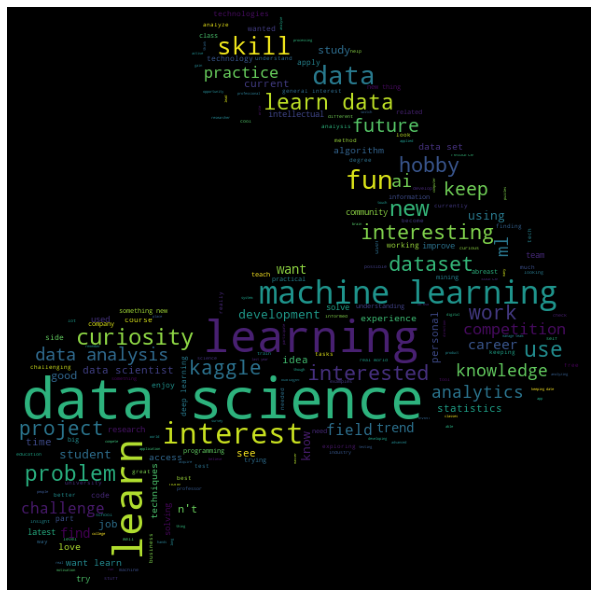

In [118]:
motivation=free['KaggleMotivationFreeForm'].dropna().apply(nltk.word_tokenize)
motivate=[]
for i in motivation:
    motivate.extend(i)
motivate=pd.Series(motivate)
motivate=([i for i in motivate.str.lower() if i not in stop_words])

f1=open("kaggle.png", "wb")
f1.write(codecs.decode(kaggle,'base64'))
f1.close()
img1 = imread("kaggle.png")
hcmask1 = img1
wc = WordCloud(background_color="black", max_words=4000, mask=hcmask1, 
               stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(motivate))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()